In [2]:
library(ggplot2)
library(reshape2)
library(dplyr)
library(ggpubr)
library('ggplot2')
library('reshape2')
library('ggpubr')
library(glmnet)
library(doMC)
library(survival)
library(data.table)
library(mltools)
library(CoxBoost)
library(randomForestSRC)
library(CoxHD)
library(Hmisc)
library(gridExtra)
library("survminer")
library(dplyr)
library(stringr)
source("../../../../src/tools.R")
options(repr.plot.res        = 100, # set a medium-definition resolution for the jupyter notebooks plots (DPI)
        repr.matrix.max.rows = 250, # set the maximum number of rows displayed
        repr.matrix.max.cols = 250)

# Added Value when we add components knowledge to chromatin splicing factors

In [2]:
SVM <- read.table("../Prognosis_results/SVM.csv",sep=',',header=T)

In [5]:
### Useful function for Comparison

comparison <-function(models = c("eln","comp"), remove_RFX_ = T ,x = 25, y = 8 ){

    df_comparison <- cbind(read.table(paste(paste("../Prognosis_results_eln_stratified/",models[1],sep=""),".tsv",sep="")),SVM=SVM[,models[1]])
    df_comparison$model <- ifelse(models[1]=="eln","ELN Recommendation 2017",
                         ifelse(models[1]=="comp","Components",models[1]))
    for (mod in models[-1]){
        tmp <- cbind(read.table(paste(paste("../Prognosis_results_eln_stratified/",mod,sep=""),".tsv",sep="")),SVM=SVM[,mod])
        tmp$model <- ifelse(mod=="eln","ELN Recommendation 2017",
                         ifelse(mod=="comp","Components",mod))
        df_comparison <- rbind(df_comparison,tmp)
    }
    df_comparison <- melt(df_comparison,id='model')
    if (remove_RFX_){df_comparison <- df_comparison[df_comparison$variable!= "RFX_",]}
    df_comparison $title <- "Comparison"
    
    
    
    
    set_notebook_plot_size(x,y)
    p1 <- ggplot(df_comparison,aes(x=variable,y=value)) + geom_boxplot(aes(fill = model), notch=F)+
    theme(strip.text = element_text(size=30),legend.position="top",axis.text.x = element_text(angle = 35, hjust = 0.8,vjust=0.8,size=20),axis.text.y = element_text(size = 20),
         axis.title.x=element_text(size=30),axis.title.y=element_text(size=30),legend.title=element_text(size=30),legend.text=element_text(size=20)) +
    ylab("C-Index") + xlab("Algorithms Comparison") + facet_wrap( ~ title) #+ stat_compare_means(paired = T)
    
    
    p2 <- ggplot(df_comparison, aes(x=reorder(model,-value,FUN=mean),y=value))+
    geom_boxplot(aes(fill =model), notch=F)+
    theme(strip.text = element_text(size=30),legend.position="none",axis.text.x = element_text(angle = 35, hjust = 0.8,vjust=0.8,size=15),axis.text.y = element_text(size = 15),
             axis.title.x=element_text(size=30),axis.title.y=element_text(size=30),legend.title=element_text(size=30),legend.text=element_text(size=20)) +
    #theme(legend.position="top",axis.text.x = element_text(angle = 90, hjust = 0.8,vjust=0.8))+
    xlab("")+ylab("C-Index")
    return(list(p1,p2))
}

# I) Comparisons for ELN VS Components

## 1) Added Value of genetic,cytogenetic and Components on ELN

[[1]]

[[2]]


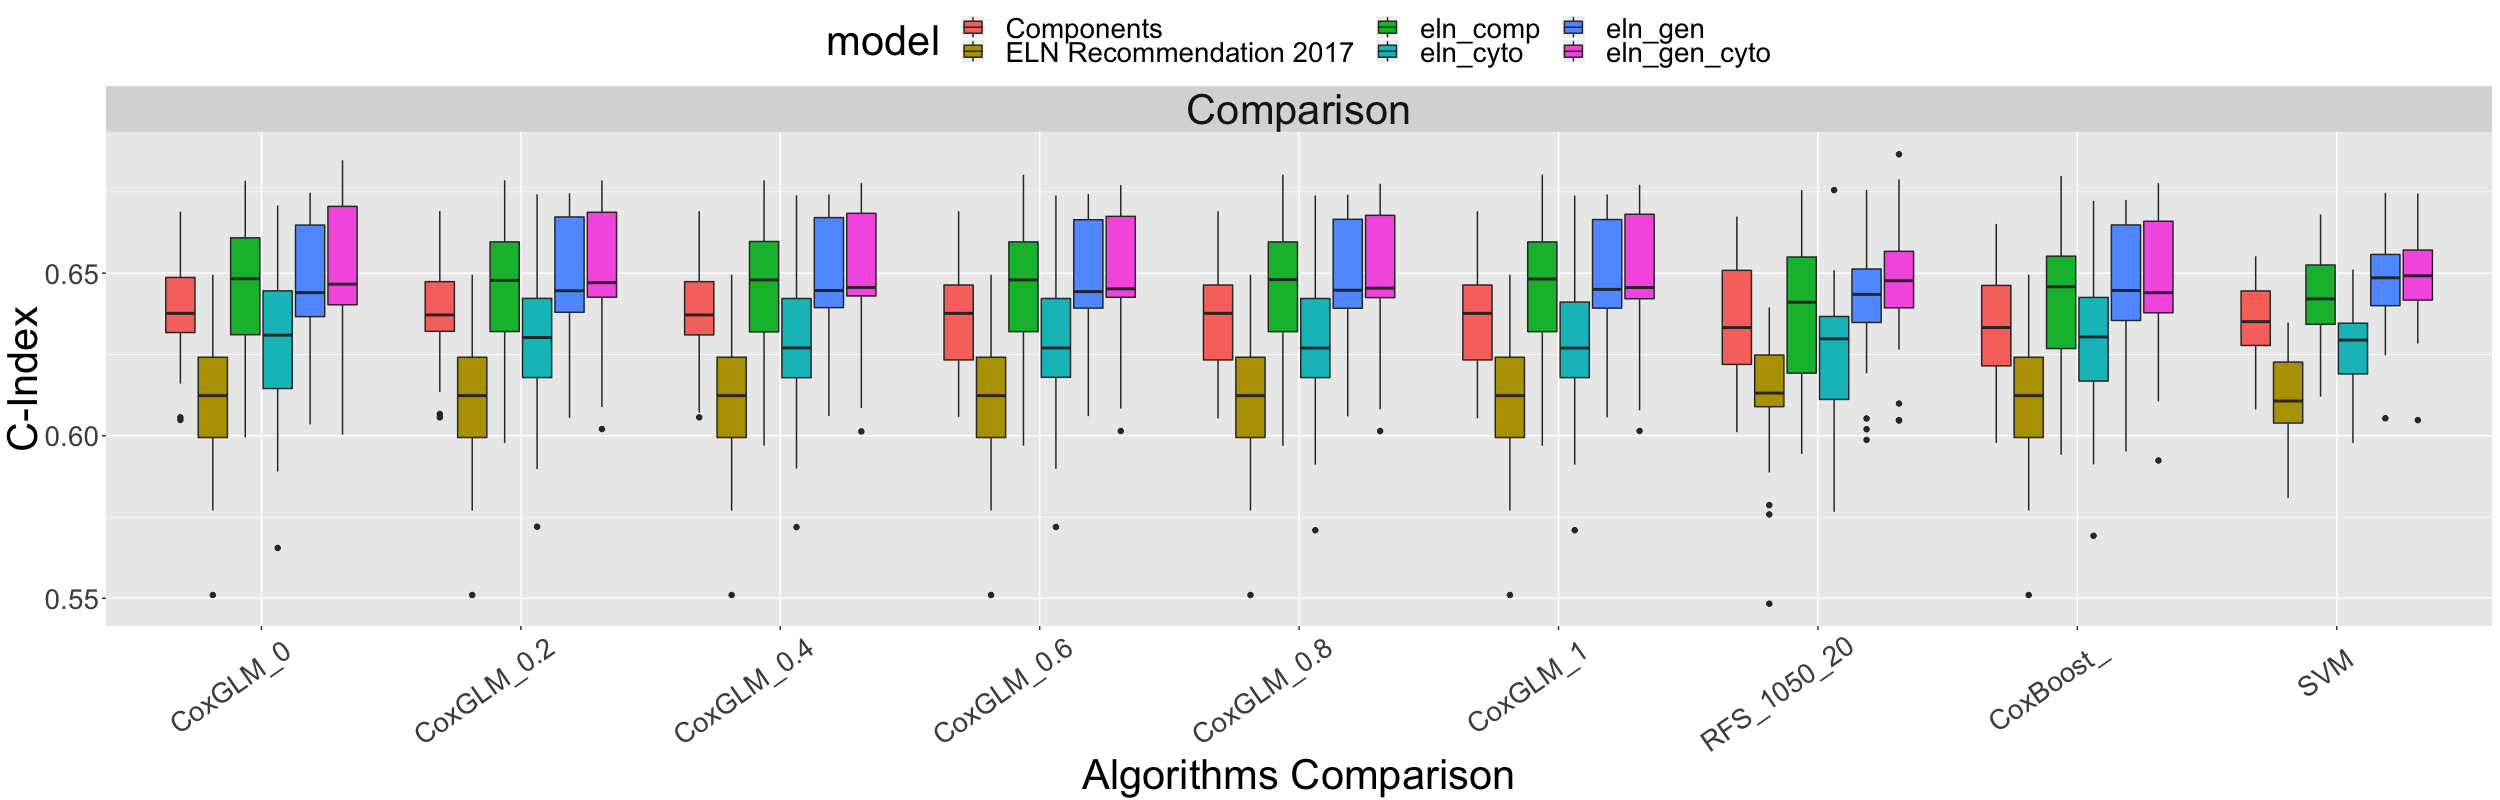

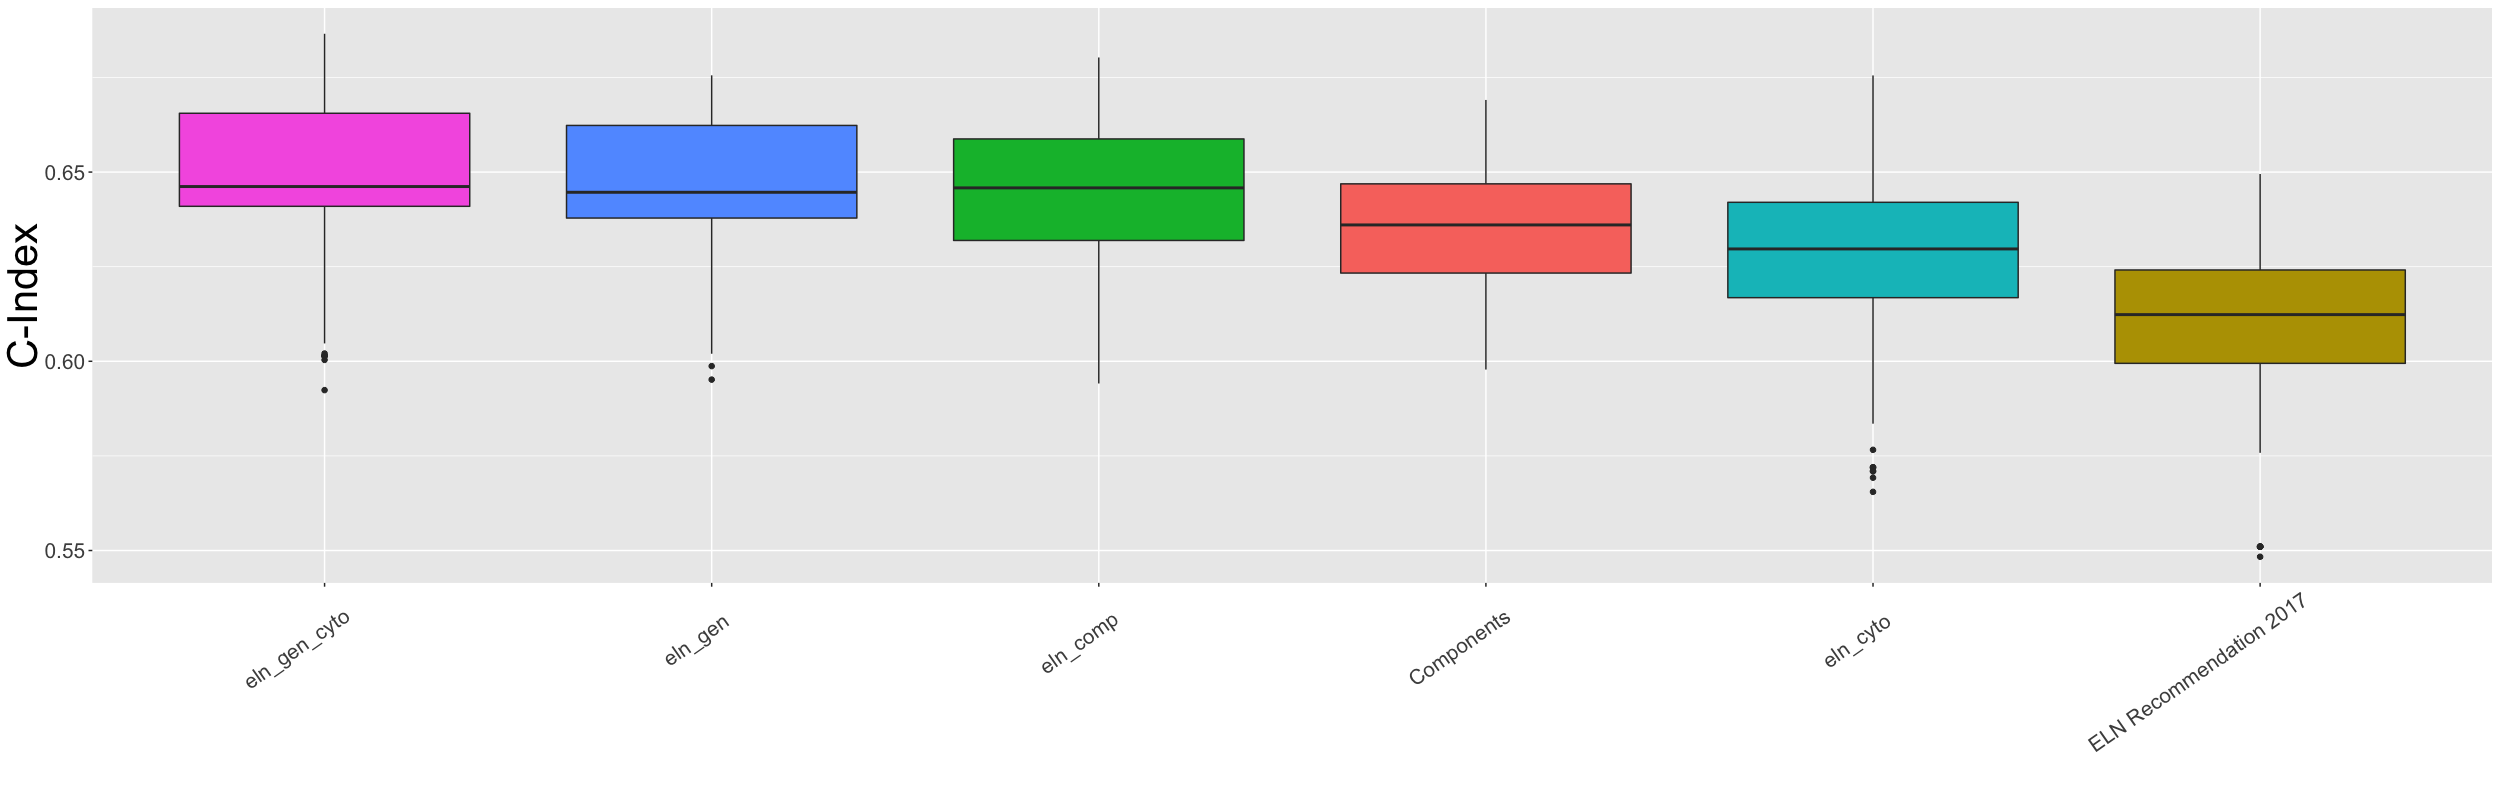

In [6]:
comparison(c("eln","eln_comp","eln_gen","eln_cyto","eln_gen_cyto","comp"))

### Huge benefit of adding components to eln! But adding gen and cyto does not bring much to eln compared to components.
### Let's show that Components are capturing cyto and genetic information by comparing the models :
In components, it means that we still miss a bit of genetic info but not much compare to ELN and we already capture all cyto info

#### Motivation to refine ELN with Components : ELN + Components capture more information than GEN + CYTO

ELN is not capturing all cyto info (graph above)
(Components are capturing all cyto info graph below)

[[1]]

[[2]]


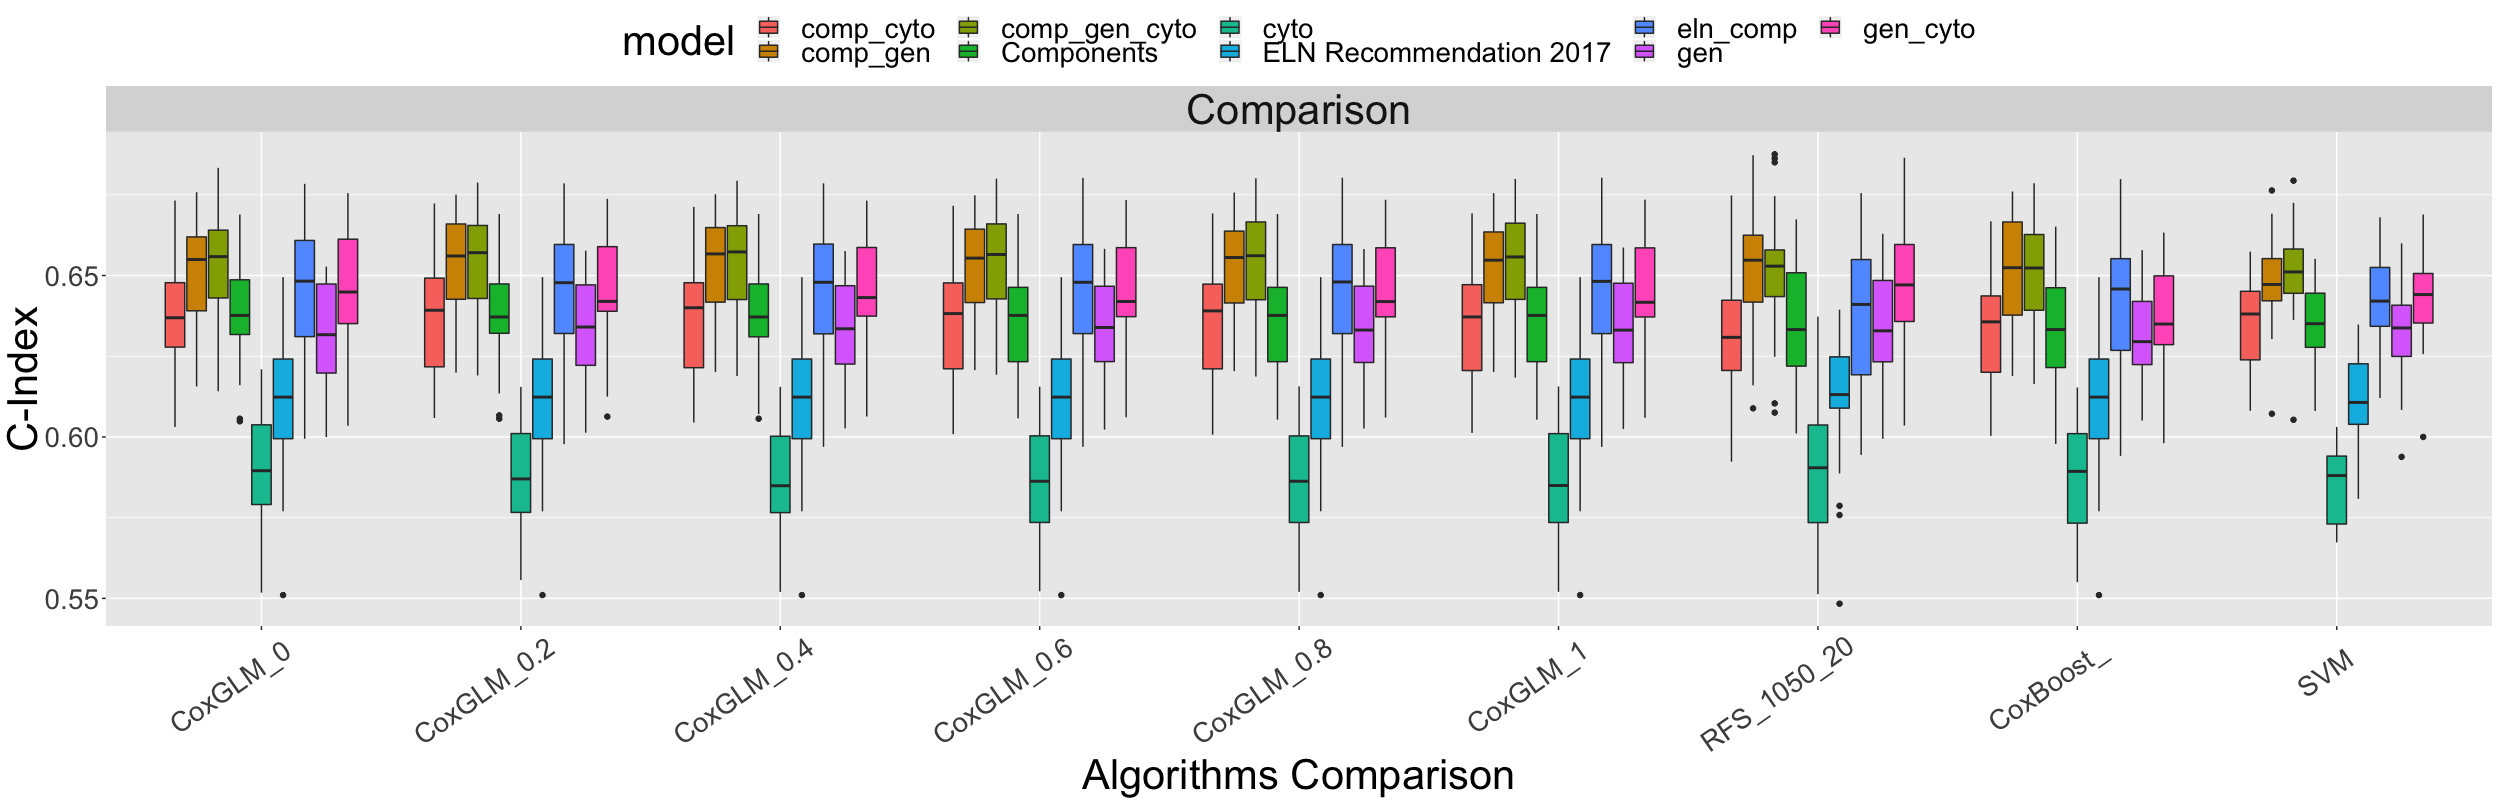

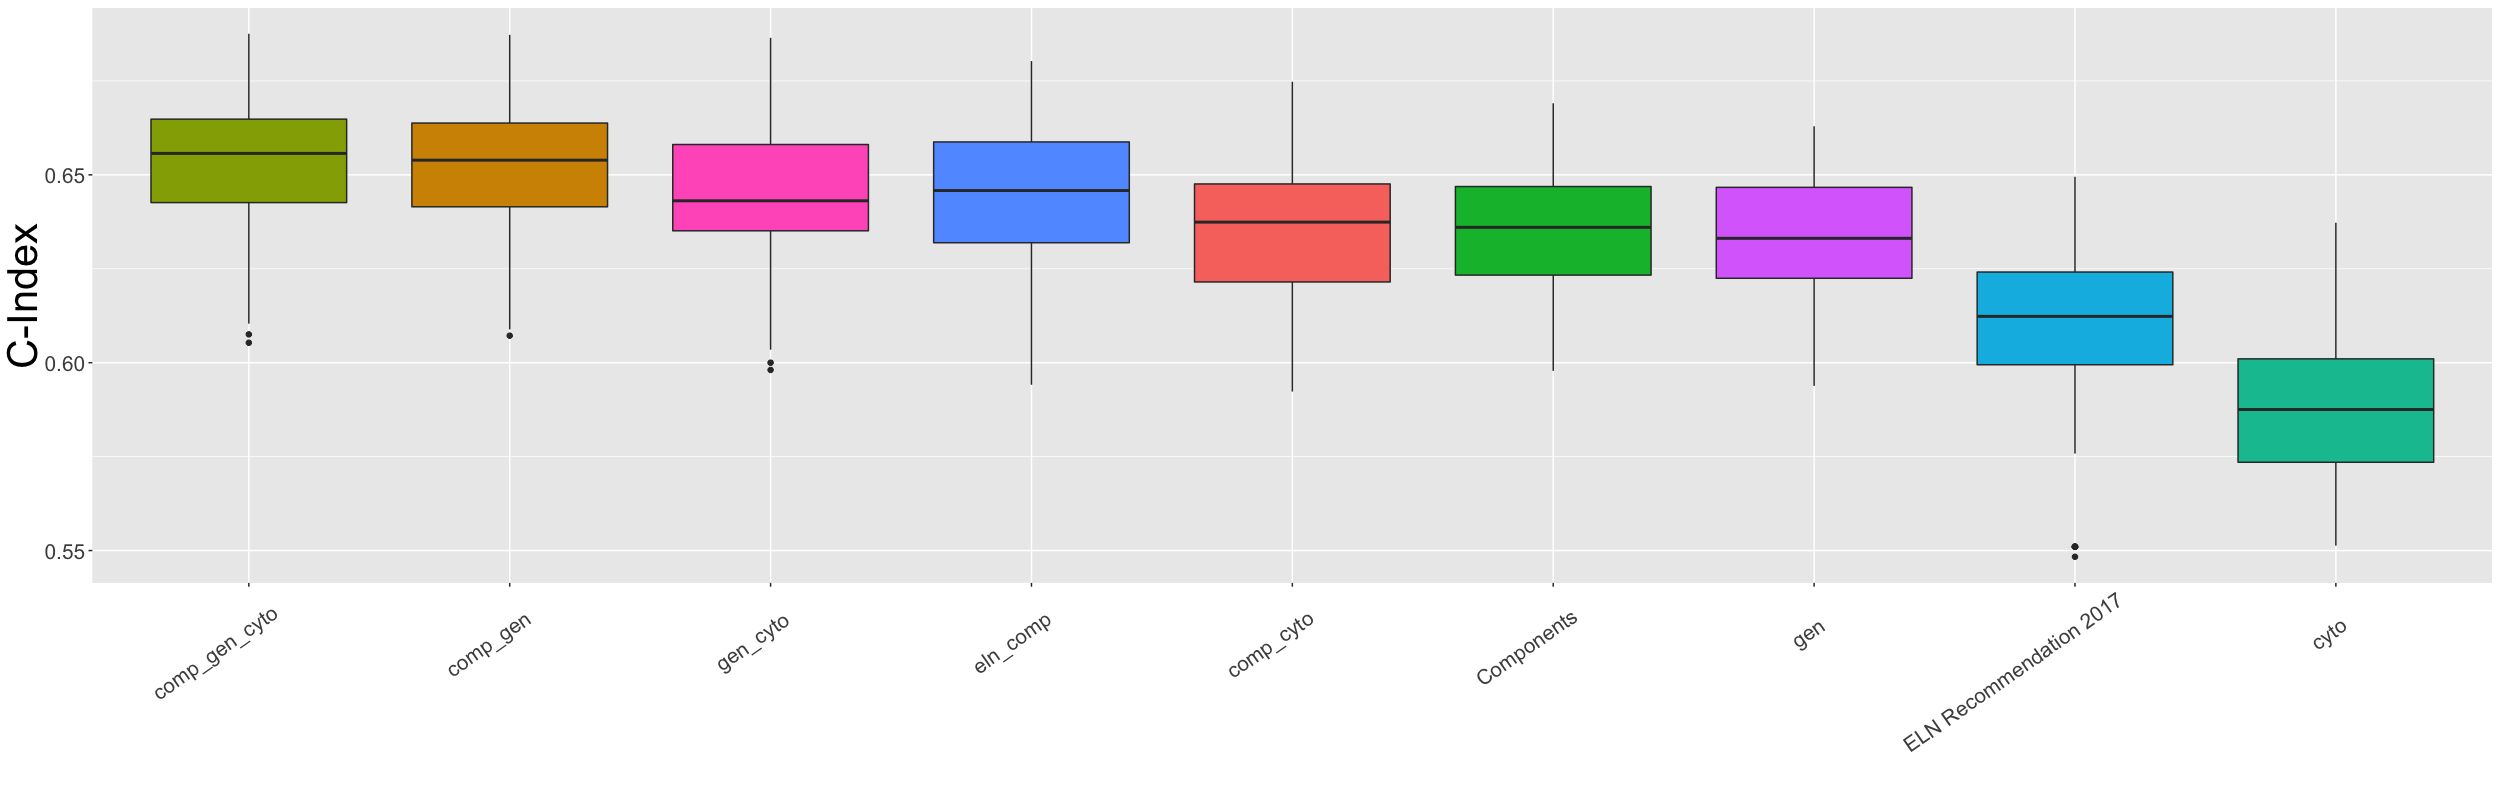

In [8]:
comparison(c("comp","eln","gen","cyto","gen_cyto","comp_gen","comp_cyto","comp_gen_cyto","eln_comp"))

## 2) Added Value of clinical and demographical features to ELN and then to Components

#### ELN and Components follow the same trend with regard to Clin and Demo : Basically because they do not capture any of the information from clinical and demo

[[1]]

[[2]]


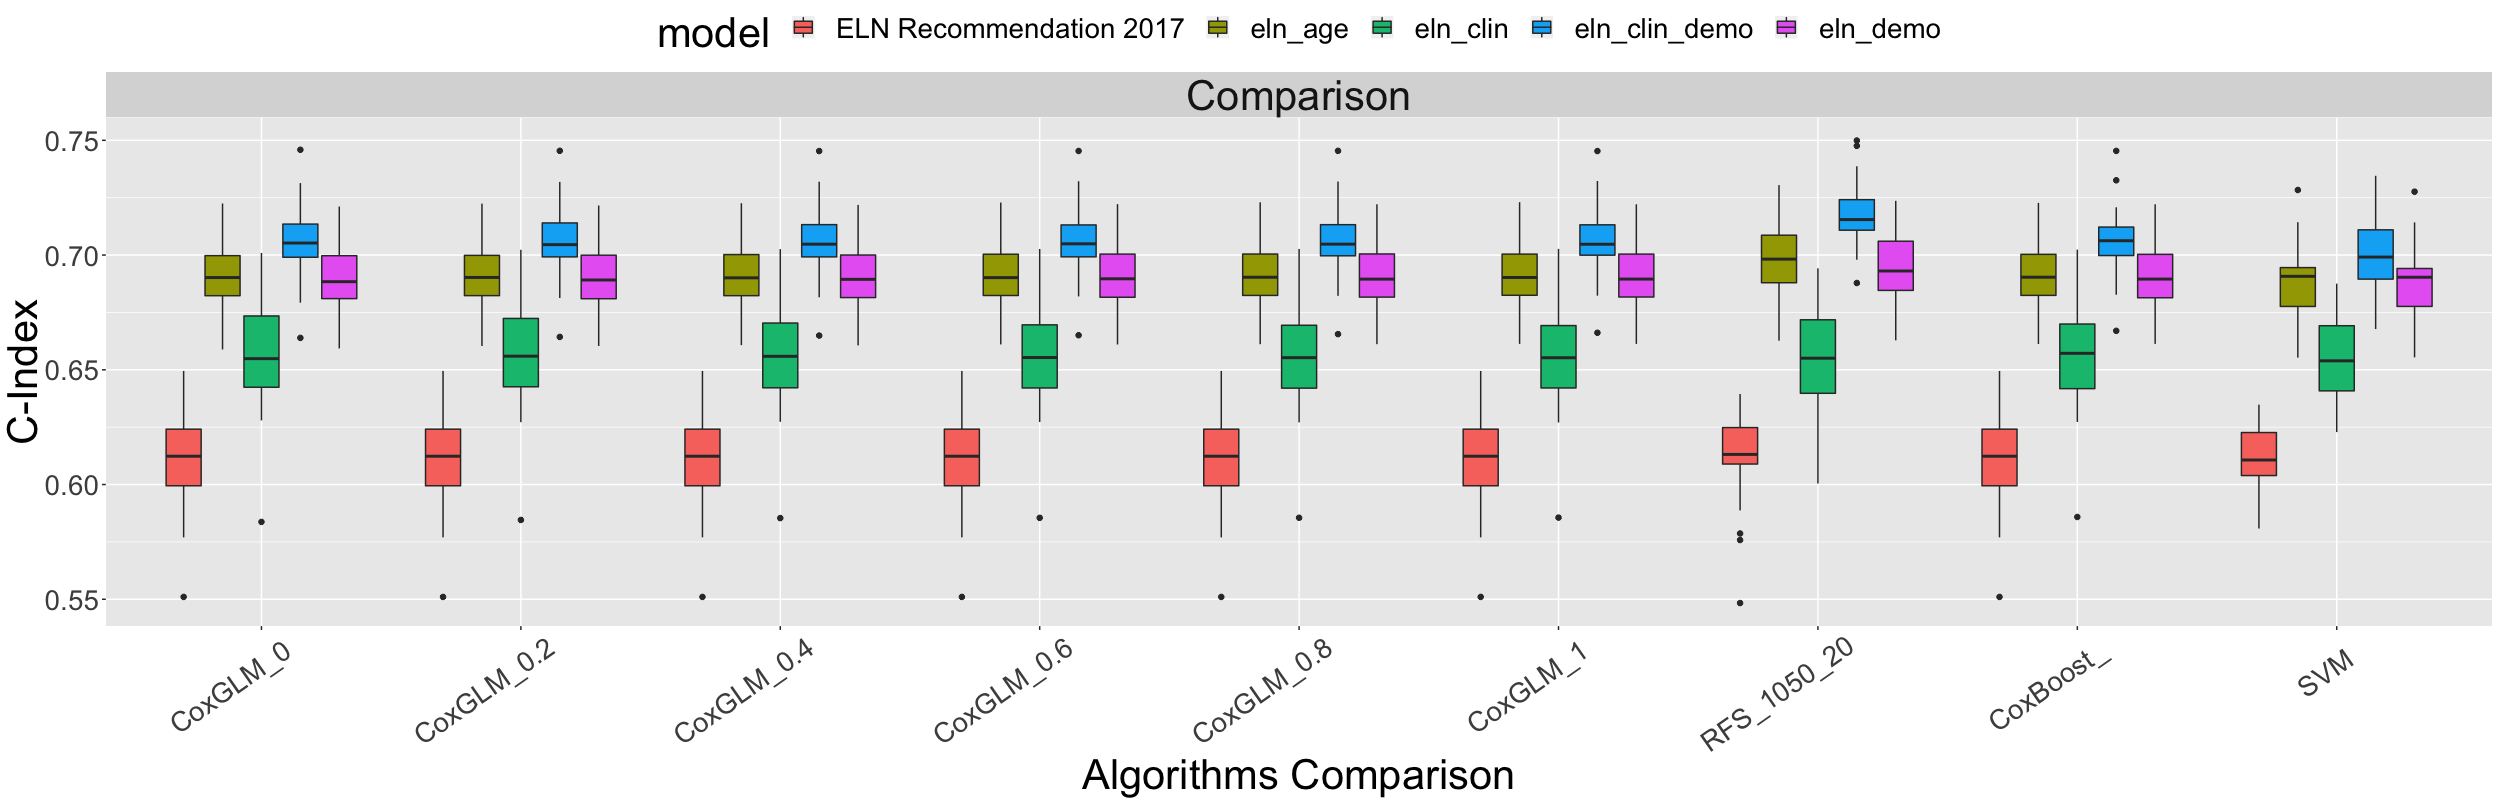

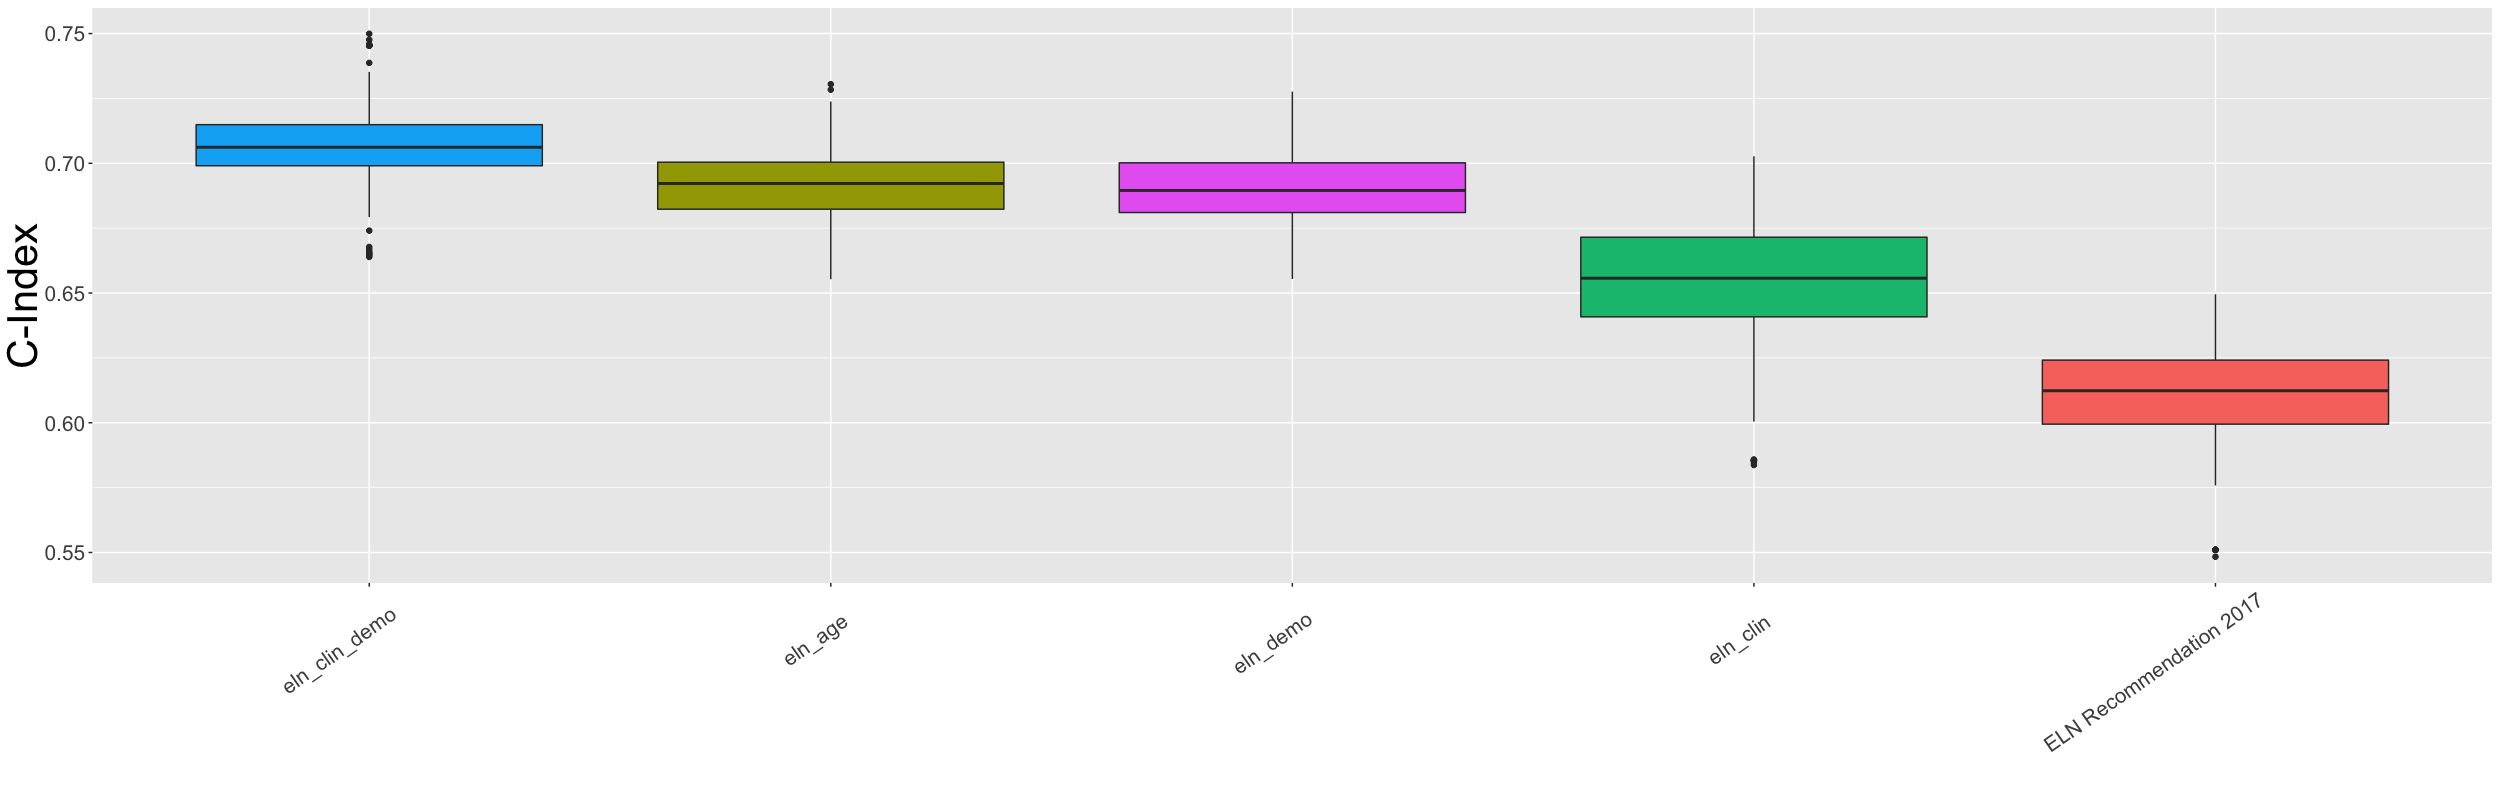

In [9]:
comparison(c("eln","eln_age","eln_demo","eln_clin","eln_clin_demo"))

# 3) Added value of Clin and Demo to Components

[[1]]

[[2]]


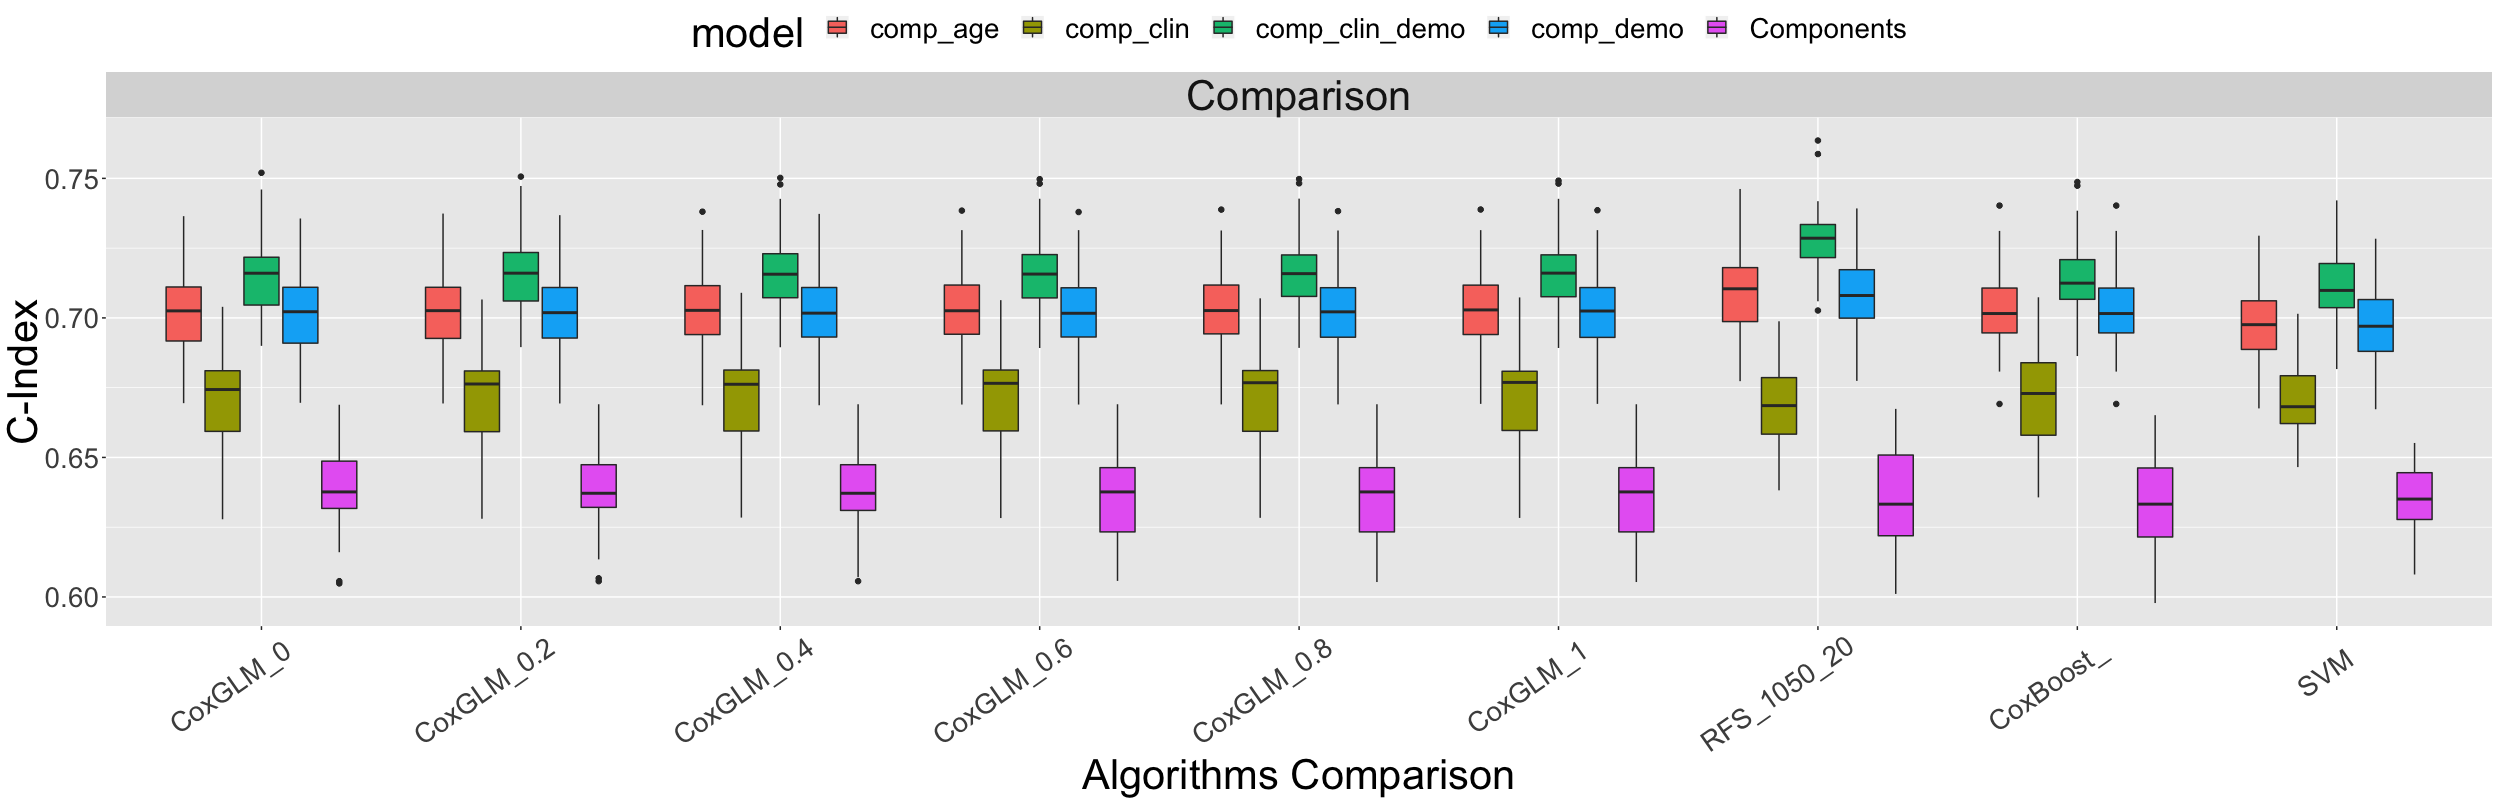

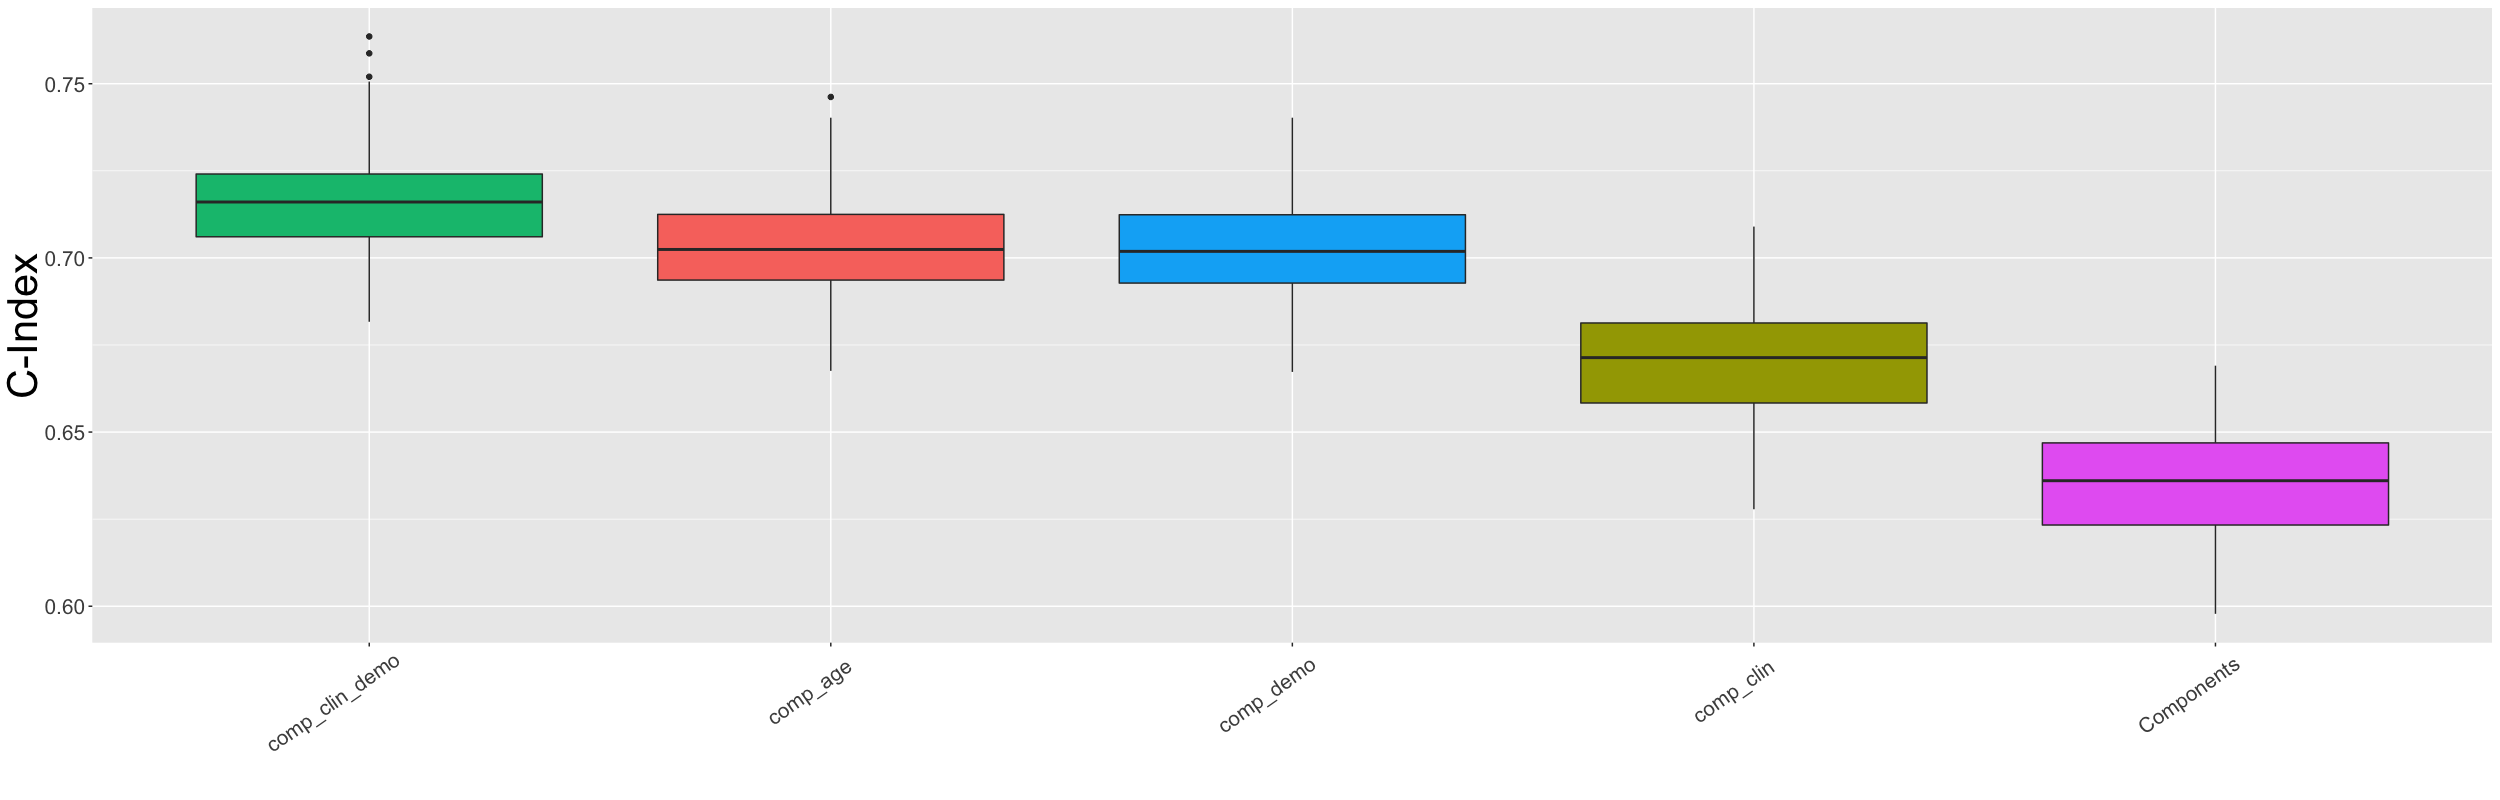

In [10]:
comparison(c("comp","comp_age","comp_demo","comp_clin","comp_clin_demo"))


# II) Comparison for Genetic and cytogenetic data

## 1) Added Value of Components , ELN  ,cytogenetic , clinical and demographical data on Genetic

[[1]]

[[2]]


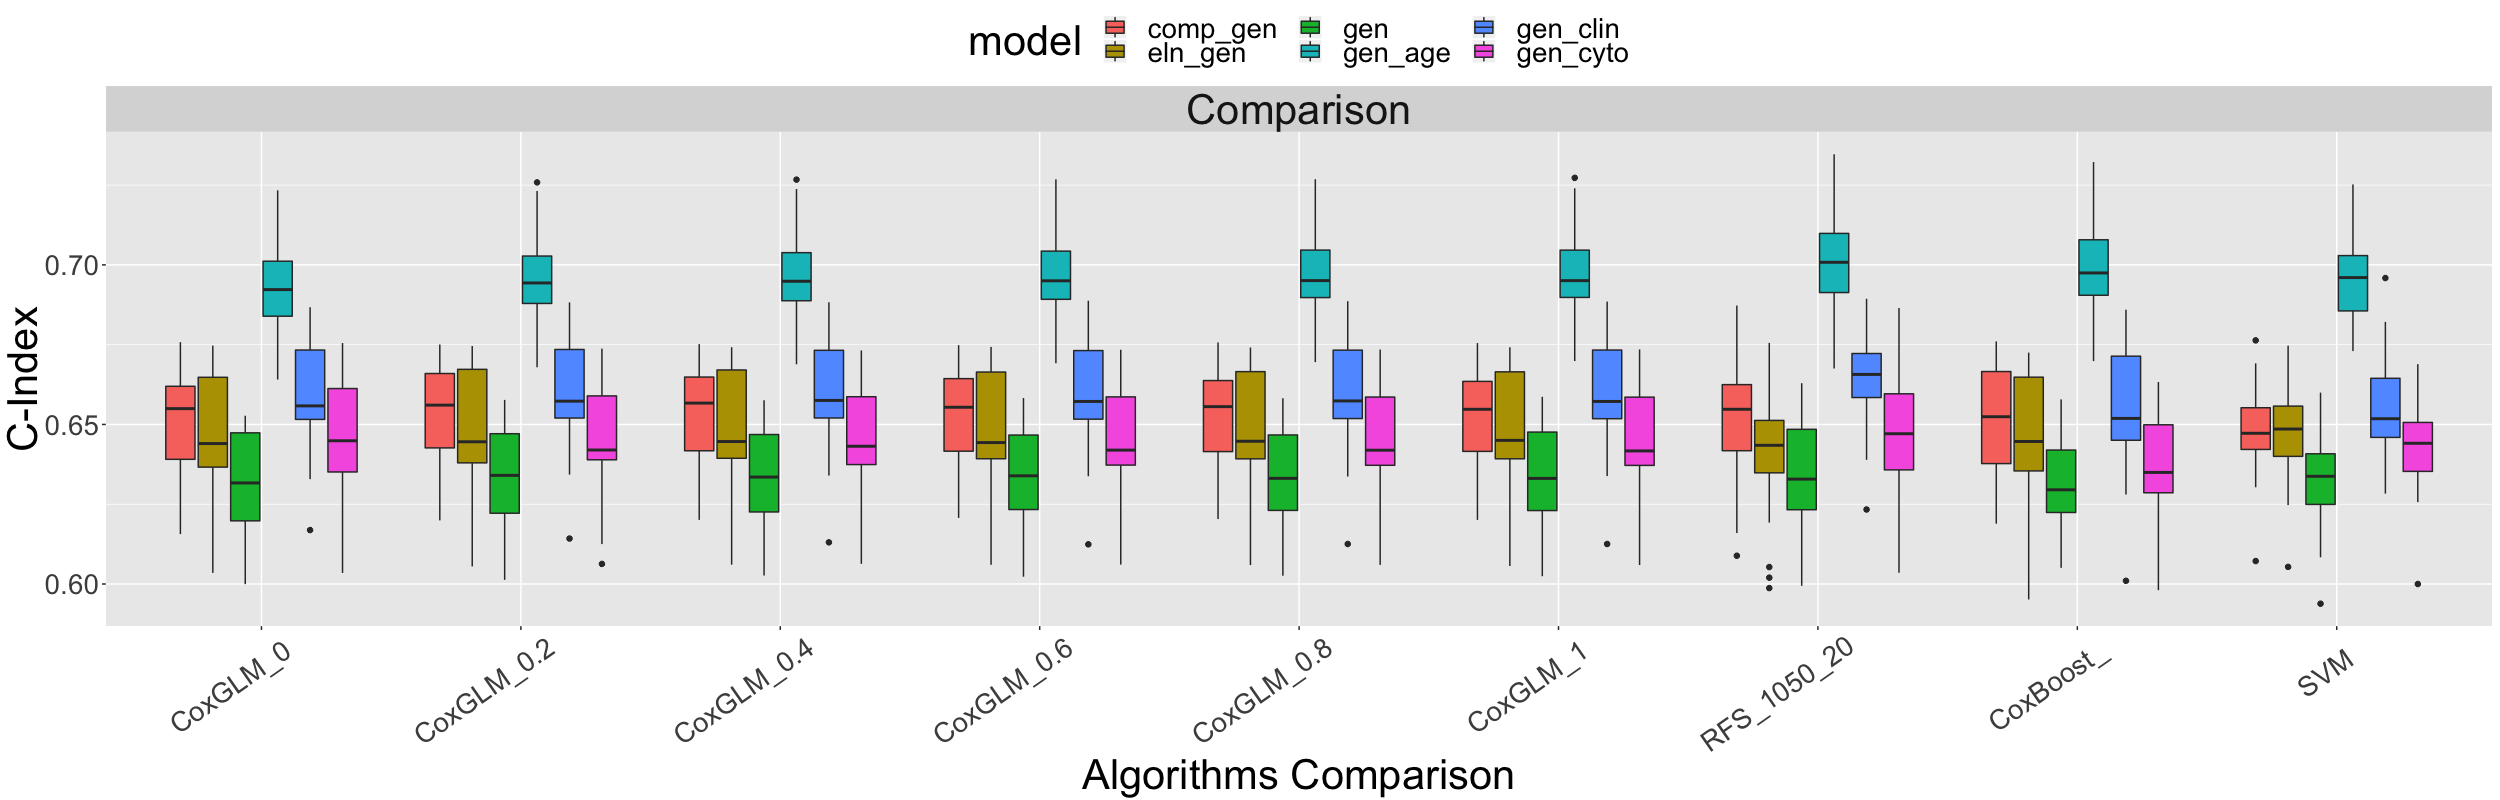

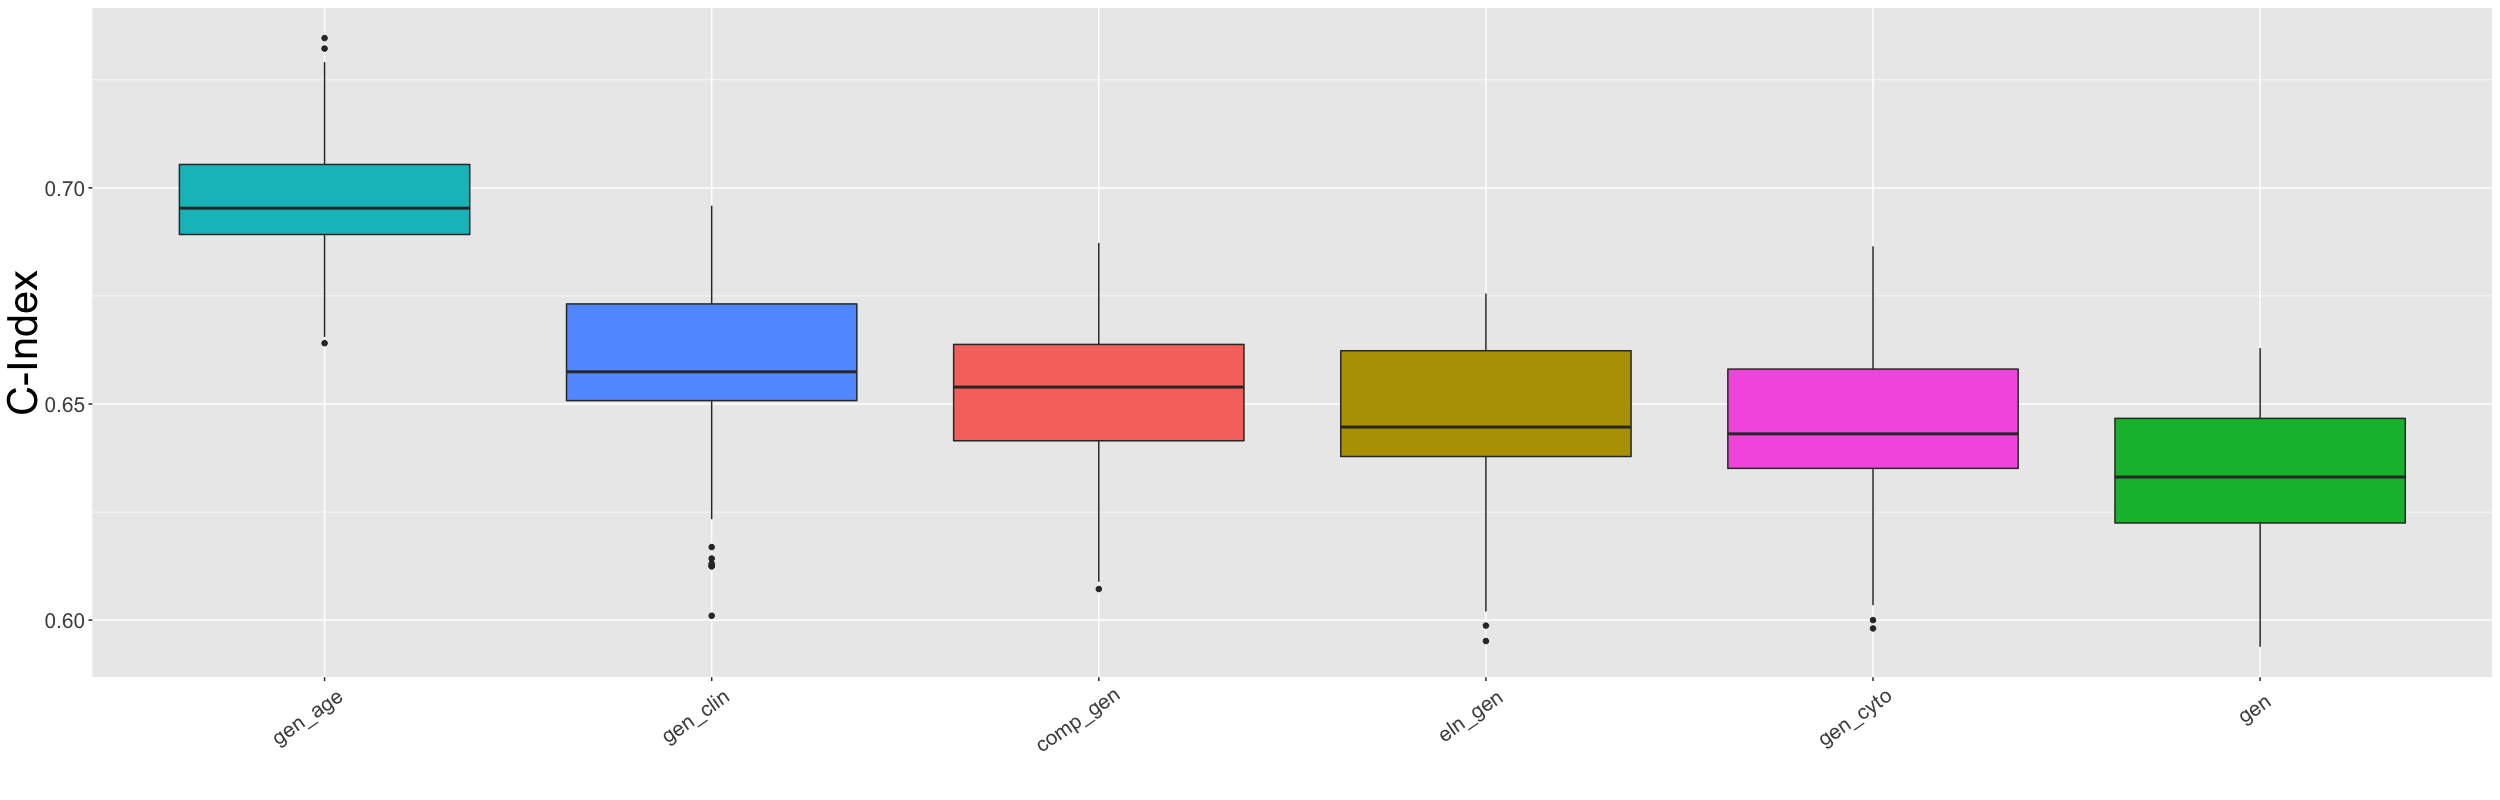

In [12]:
comparison(c("gen","comp_gen","eln_gen","gen_cyto","gen_clin","gen_age"))

## 2) Added Value of Components , ELN ,genetic  clinical and demographical data on Genetic

#### Again, it shows that information from cyto is contained in Component but not in ELN because comp_cyto and eln_cyto performs similarly

[[1]]

[[2]]


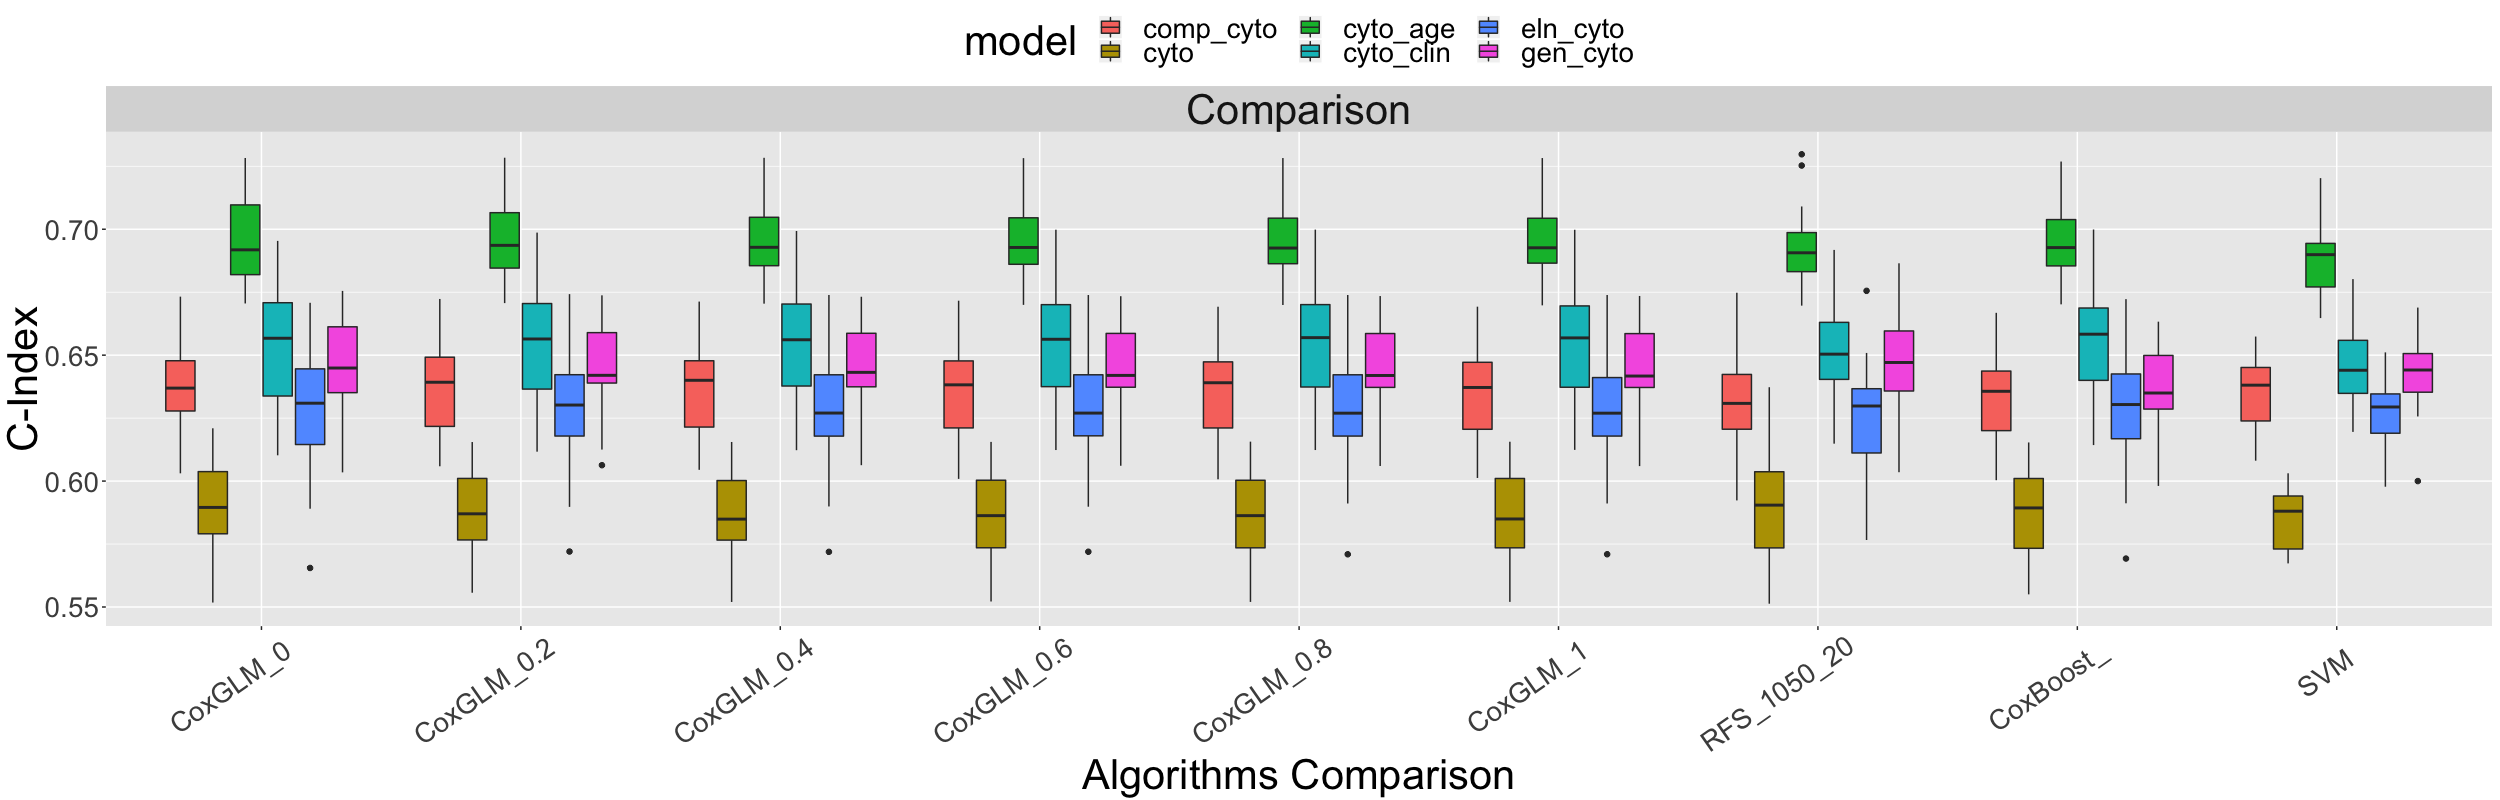

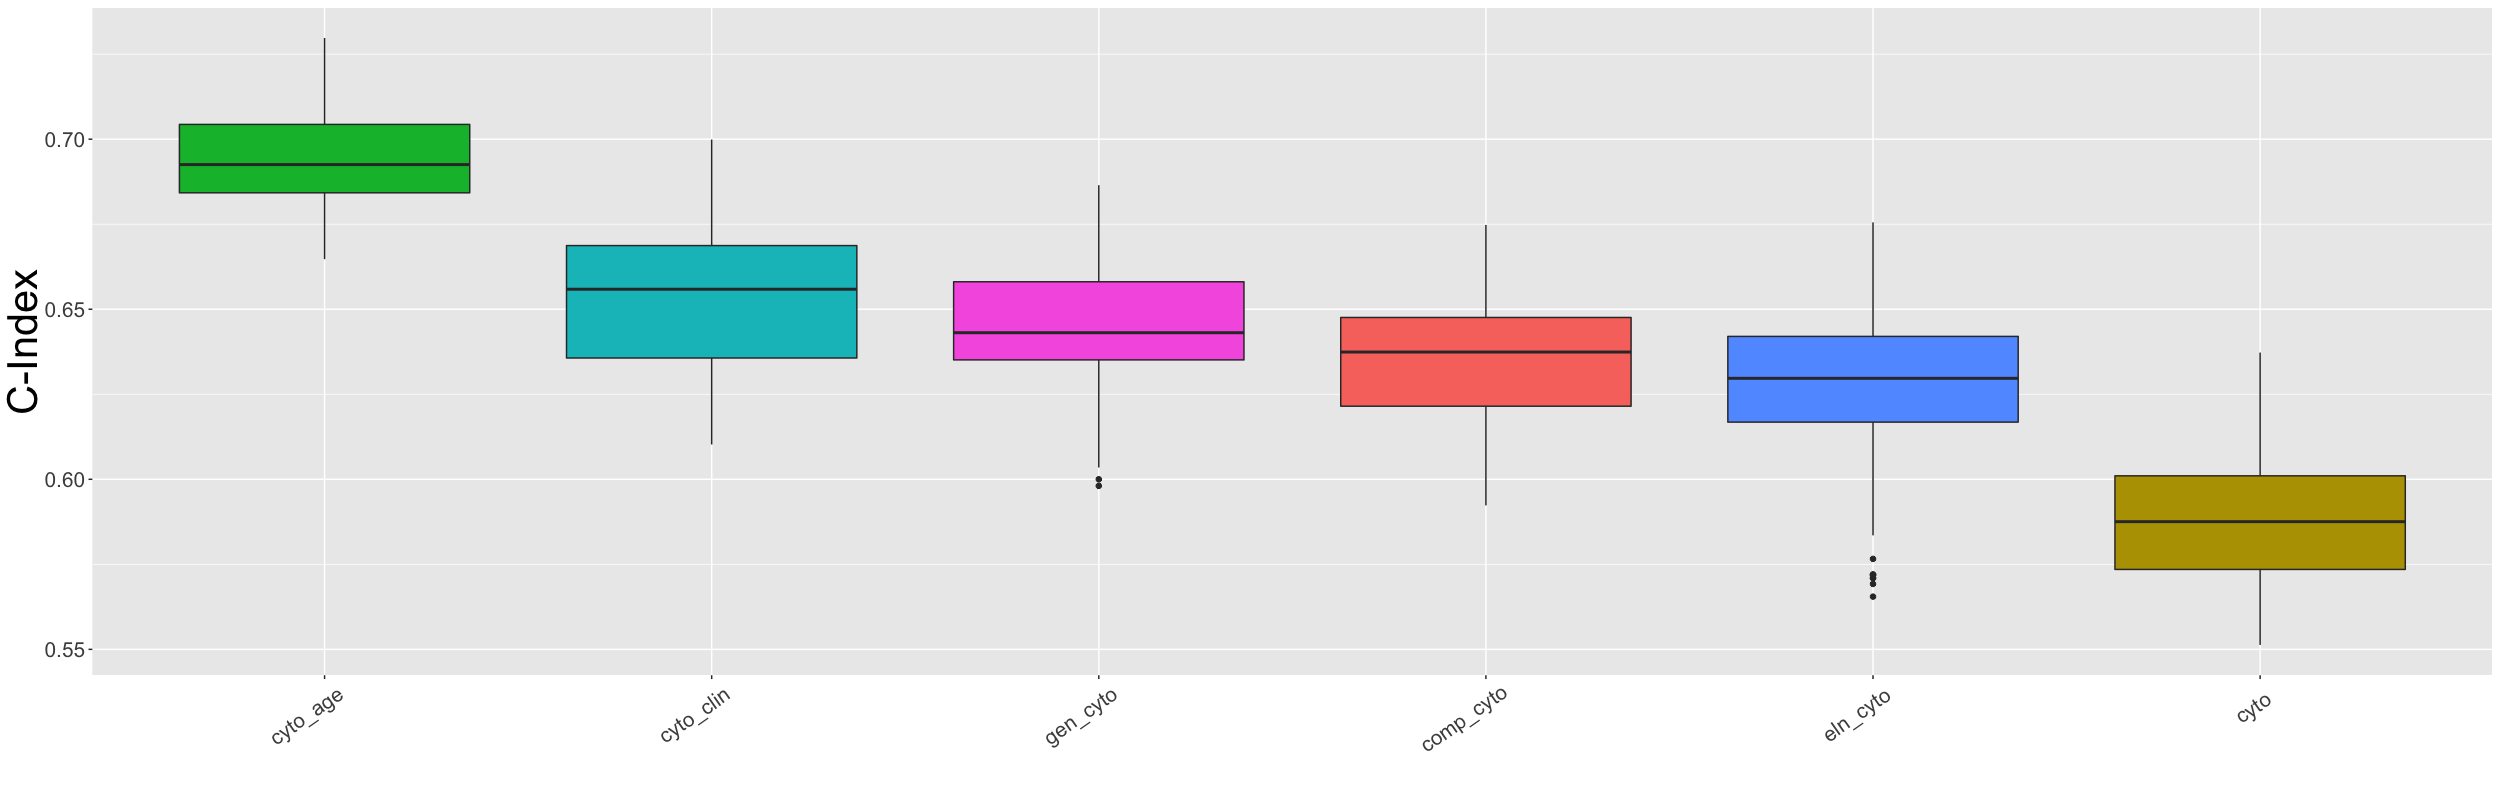

In [14]:
comparison(c("cyto","comp_cyto","eln_cyto","gen_cyto","cyto_clin","cyto_age"))

# III) Comparison for Age and Clinical 

## 1) Added value of Components , ELN , clinical , genetic and cytogenetic on Age 

### The biggest improvement for age is component

[[1]]

[[2]]


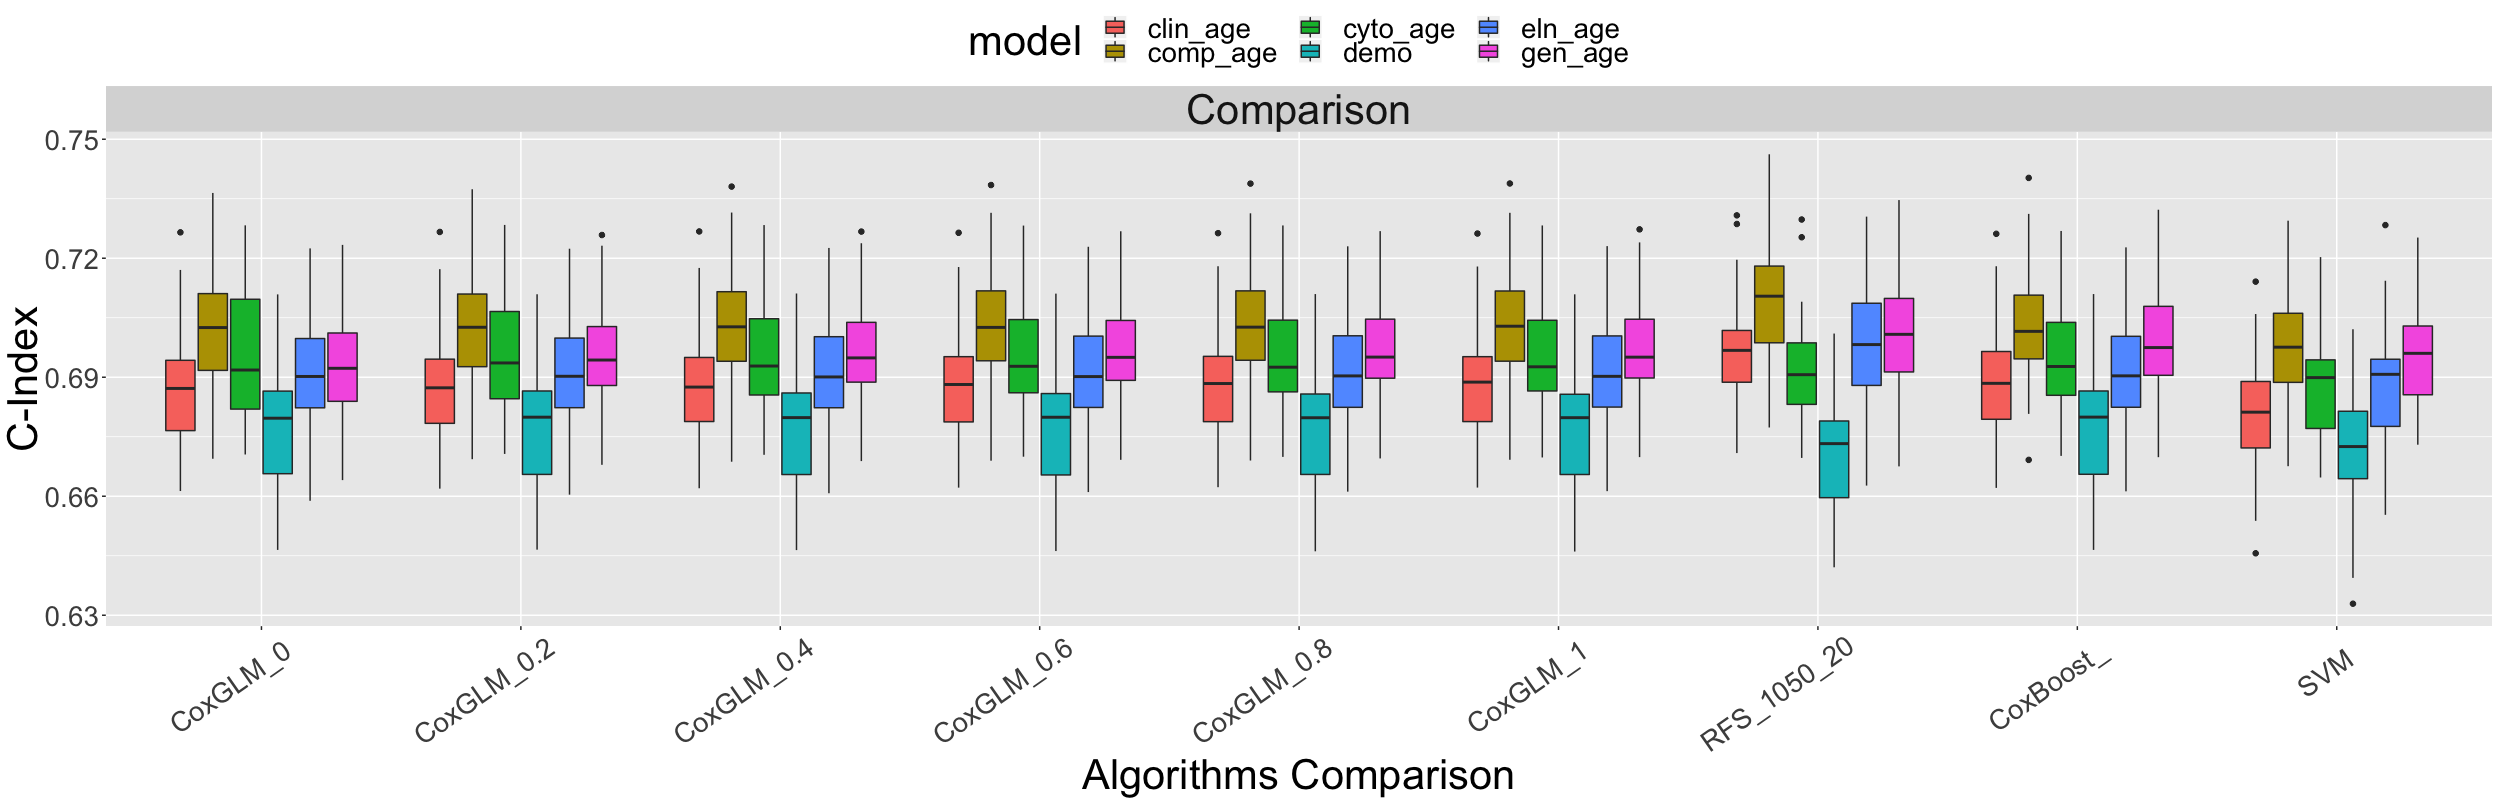

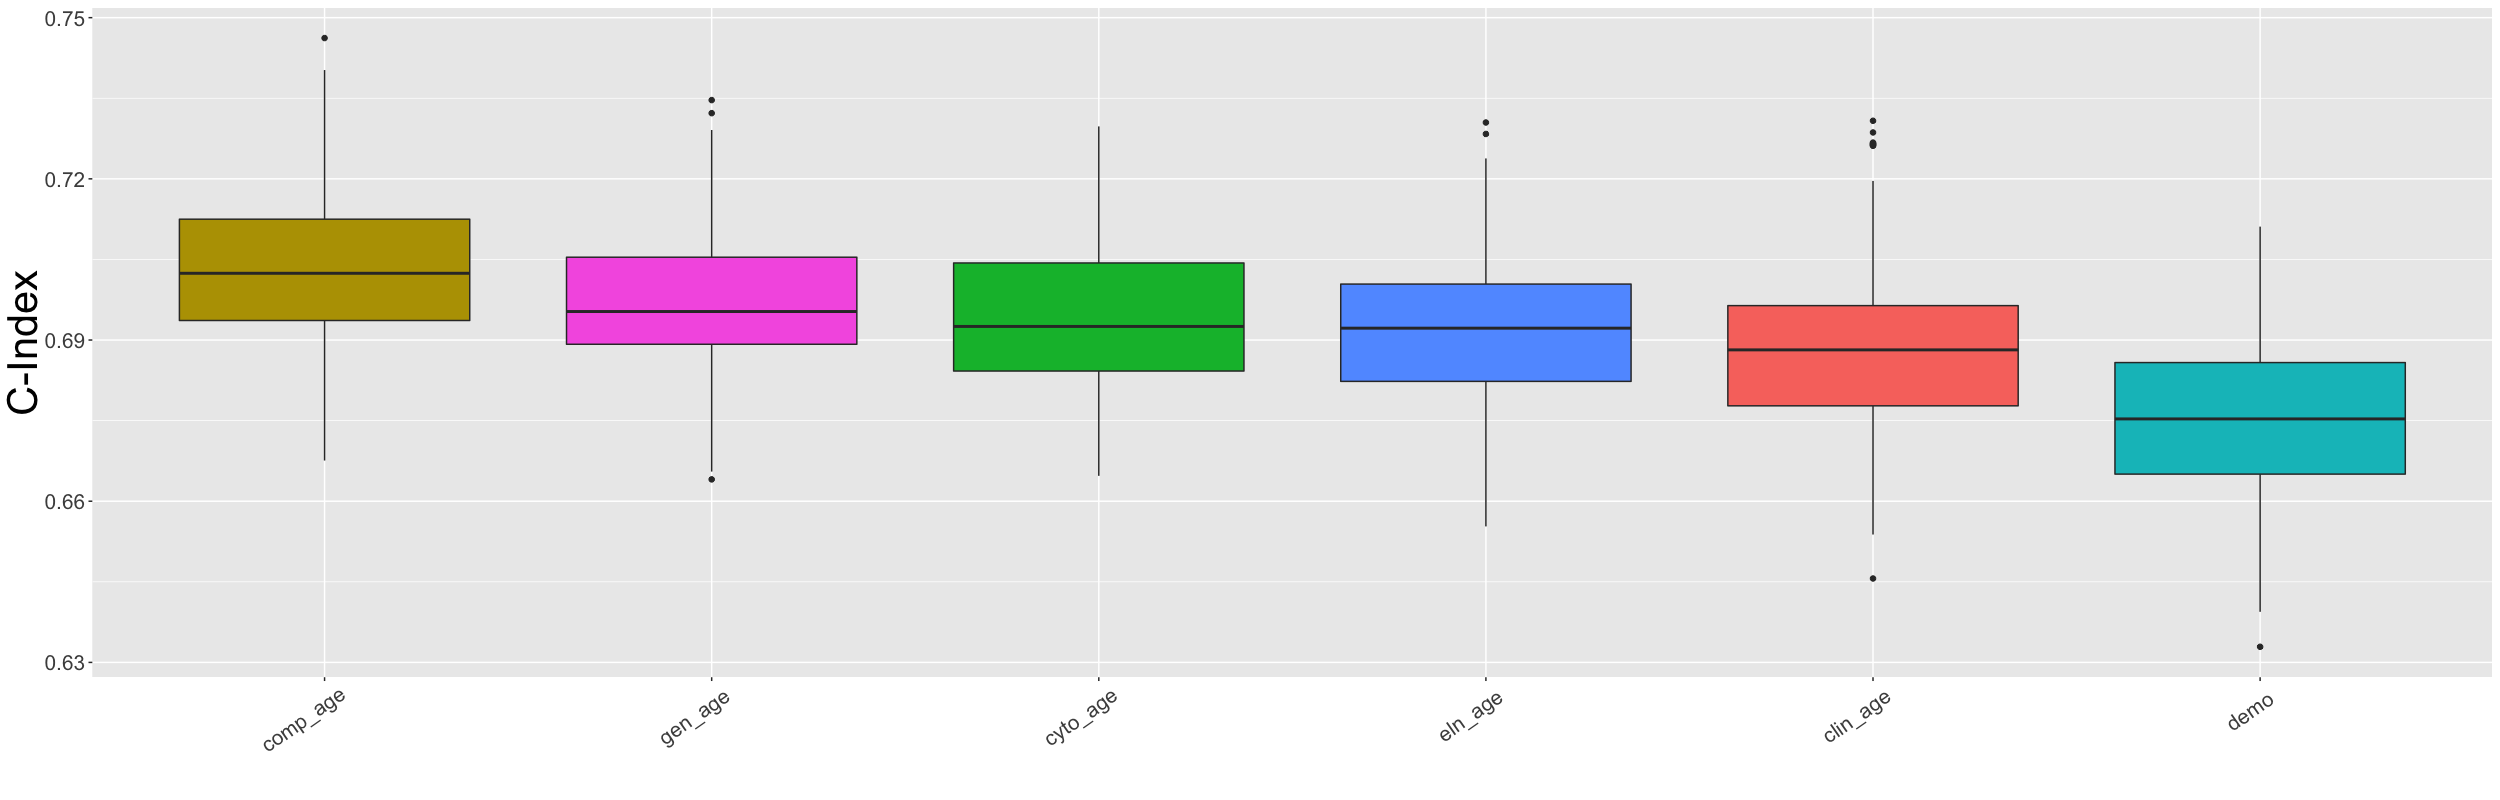

In [15]:
comparison(c("gen_age","comp_age","eln_age","clin_age","cyto_age","demo"))

## 2) Added value of Components , ELN , age , genetic and cytogenetic on clinical

[[1]]

[[2]]


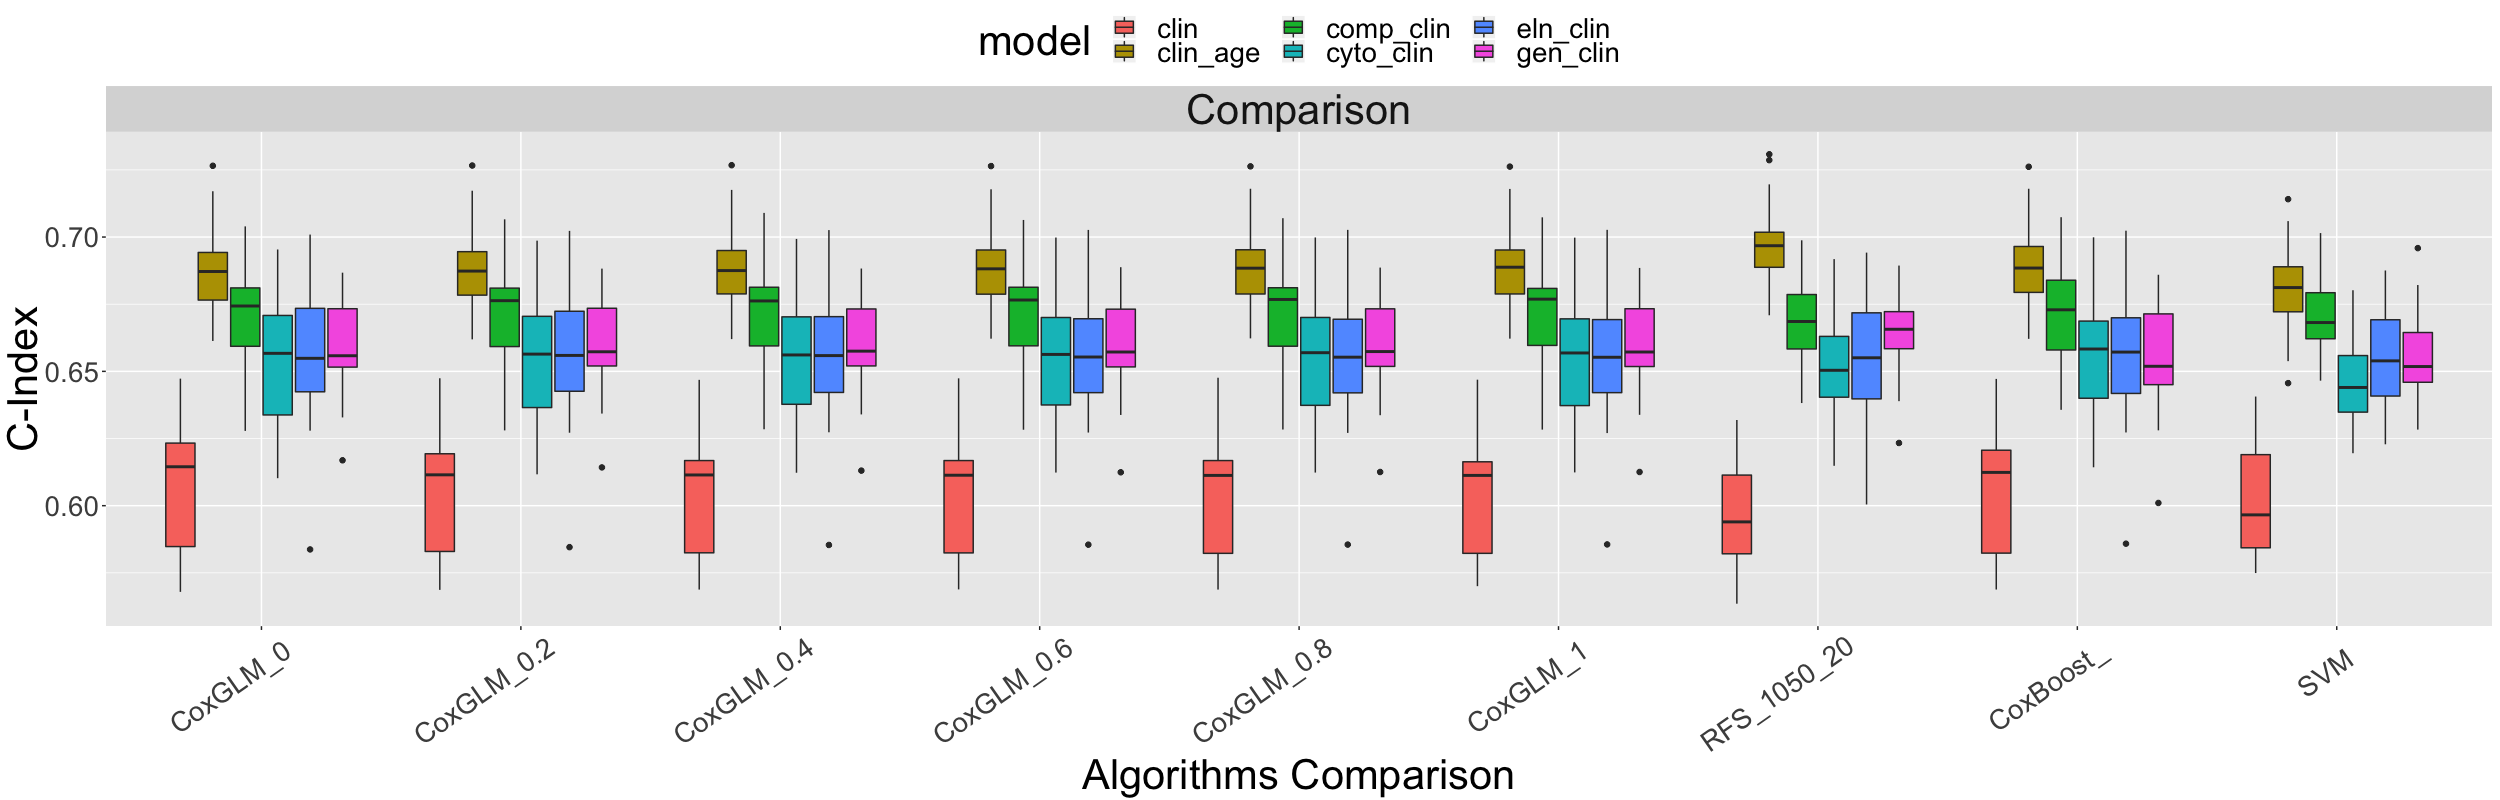

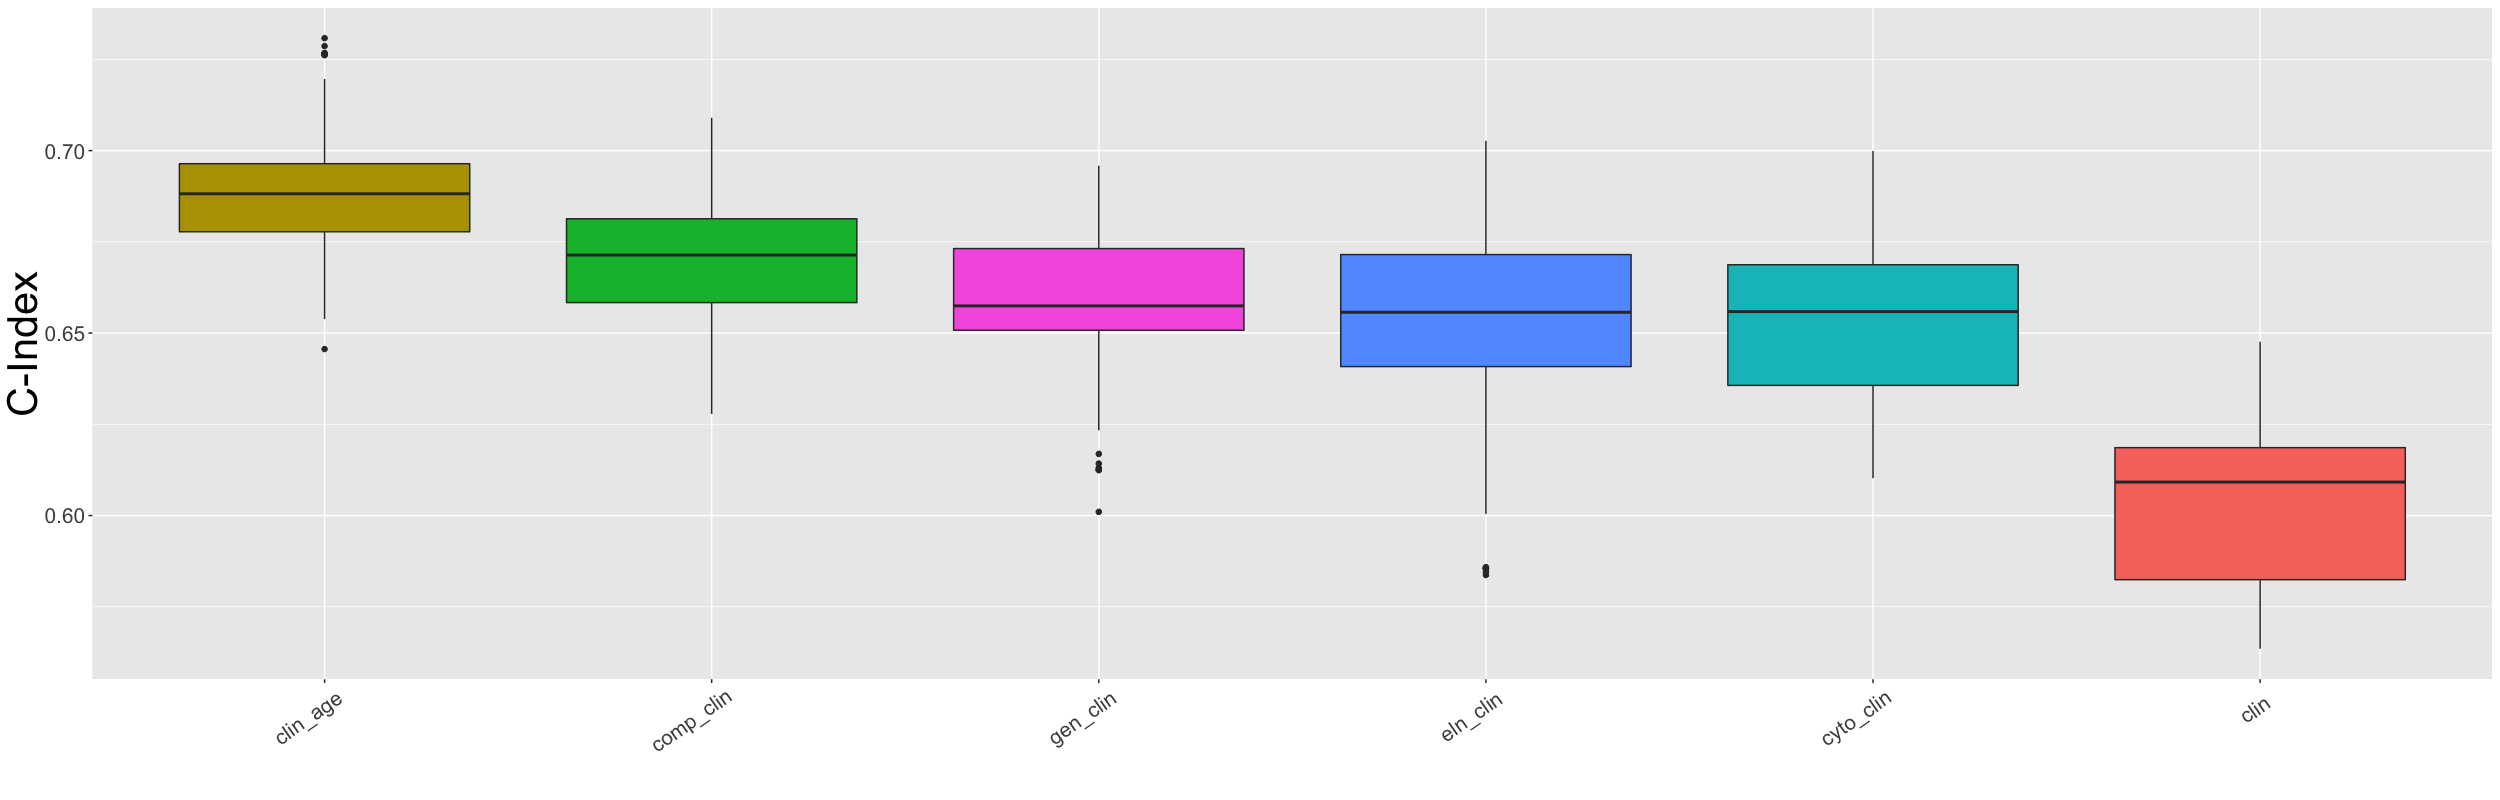

In [17]:
comparison(c("gen_clin","comp_clin","eln_clin","clin_age","cyto_clin","clin"))

In [22]:
sum(colMeans(read.table("../Prognosis_results/eln_age.tsv")))
sum(colMeans(read.table("../Prognosis_results_eln_stratified/eln_age.tsv")))


[1] 6.225783

[1] 6.228269

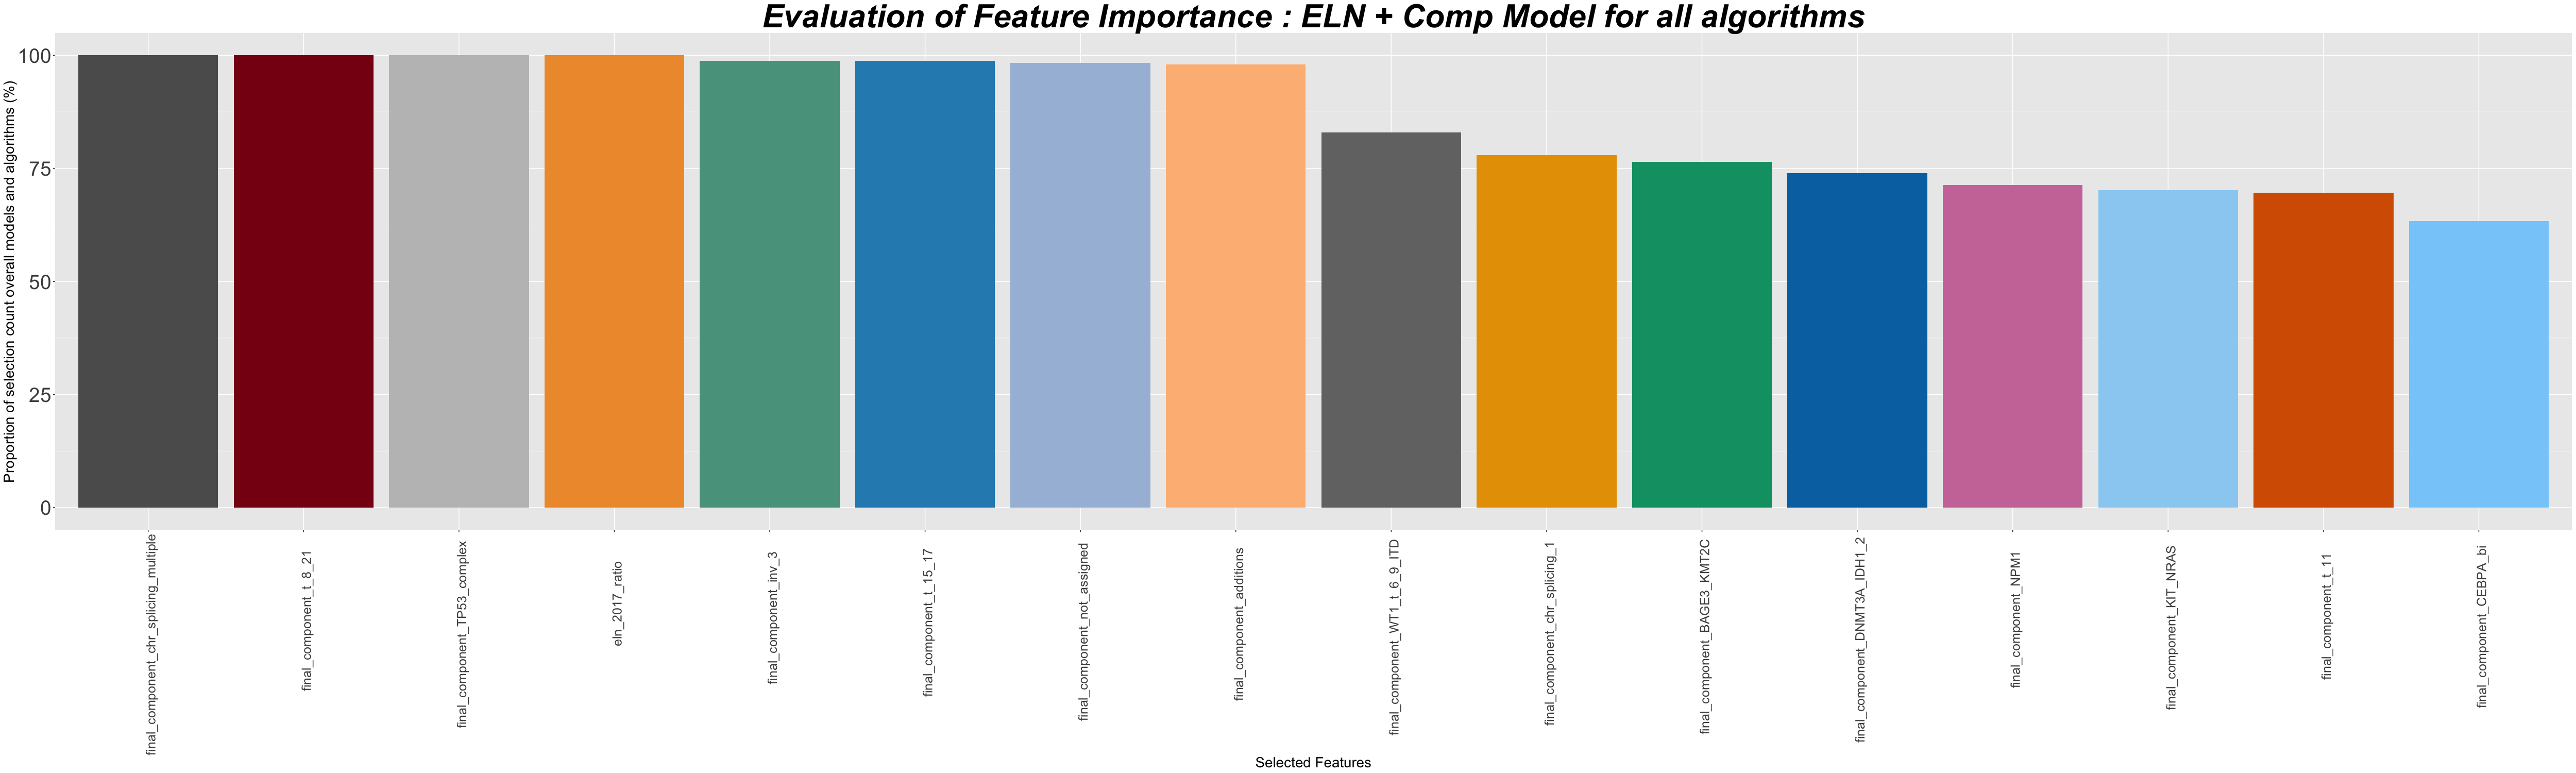

In [99]:
set_notebook_plot_size(50,15)
cols <- c("eln_2017_ratio" = "#EE9937", "final_component_chr_splicing_multiple" = "#5C5C5C", "final_component_t_8_21" = "#870C14", "final_component_TP53_complex" = "#BFBFBF",
         "final_component_inv_3" = "#59A08B", "final_component_t_15_17" = "#2b8cbe", "final_component_not_assigned" = "#a6bddb", "final_component_additions" = "#fdbb84",
         "final_component_WT1_t_6_9_ITD" = "grey45", "final_component_chr_splicing_1" = "#e79f00", "final_component_BAGE3_KMT2C" = "#009E73", "final_component_DNMT3A_IDH1_2" = "#0072B2",
         "final_component_NPM1" = "#CC79A7", "final_component_KIT_NRAS" = "#9ad0f3", "final_component_t_11" = "#D55E00", "final_component_CEBPA_bi" = "lightskyblue")
ggplot(na.omit(eln_comp),aes(x=reorder(feature,-proportion_selected),y=proportion_selected))+geom_bar(stat = "identity", aes(fill = reorder(feature,-proportion_selected)))+
theme(plot.title = element_text( size=45, face="bold.italic",hjust=0.5),legend.position="none",axis.text.x = element_text(angle = 90, hjust = 0.8,vjust=0.8,size=18),axis.text.y=element_text(size=28),axis.title.y = element_text(size = 20),axis.title.x = element_text(size = 20))+xlab("Selected Features") +
ylab("Proportion of selection count overall models and algorithms (%)") + ggtitle("Evaluation of Feature Importance : ELN + Comp Model for all algorithms")+scale_fill_manual(values = cols)

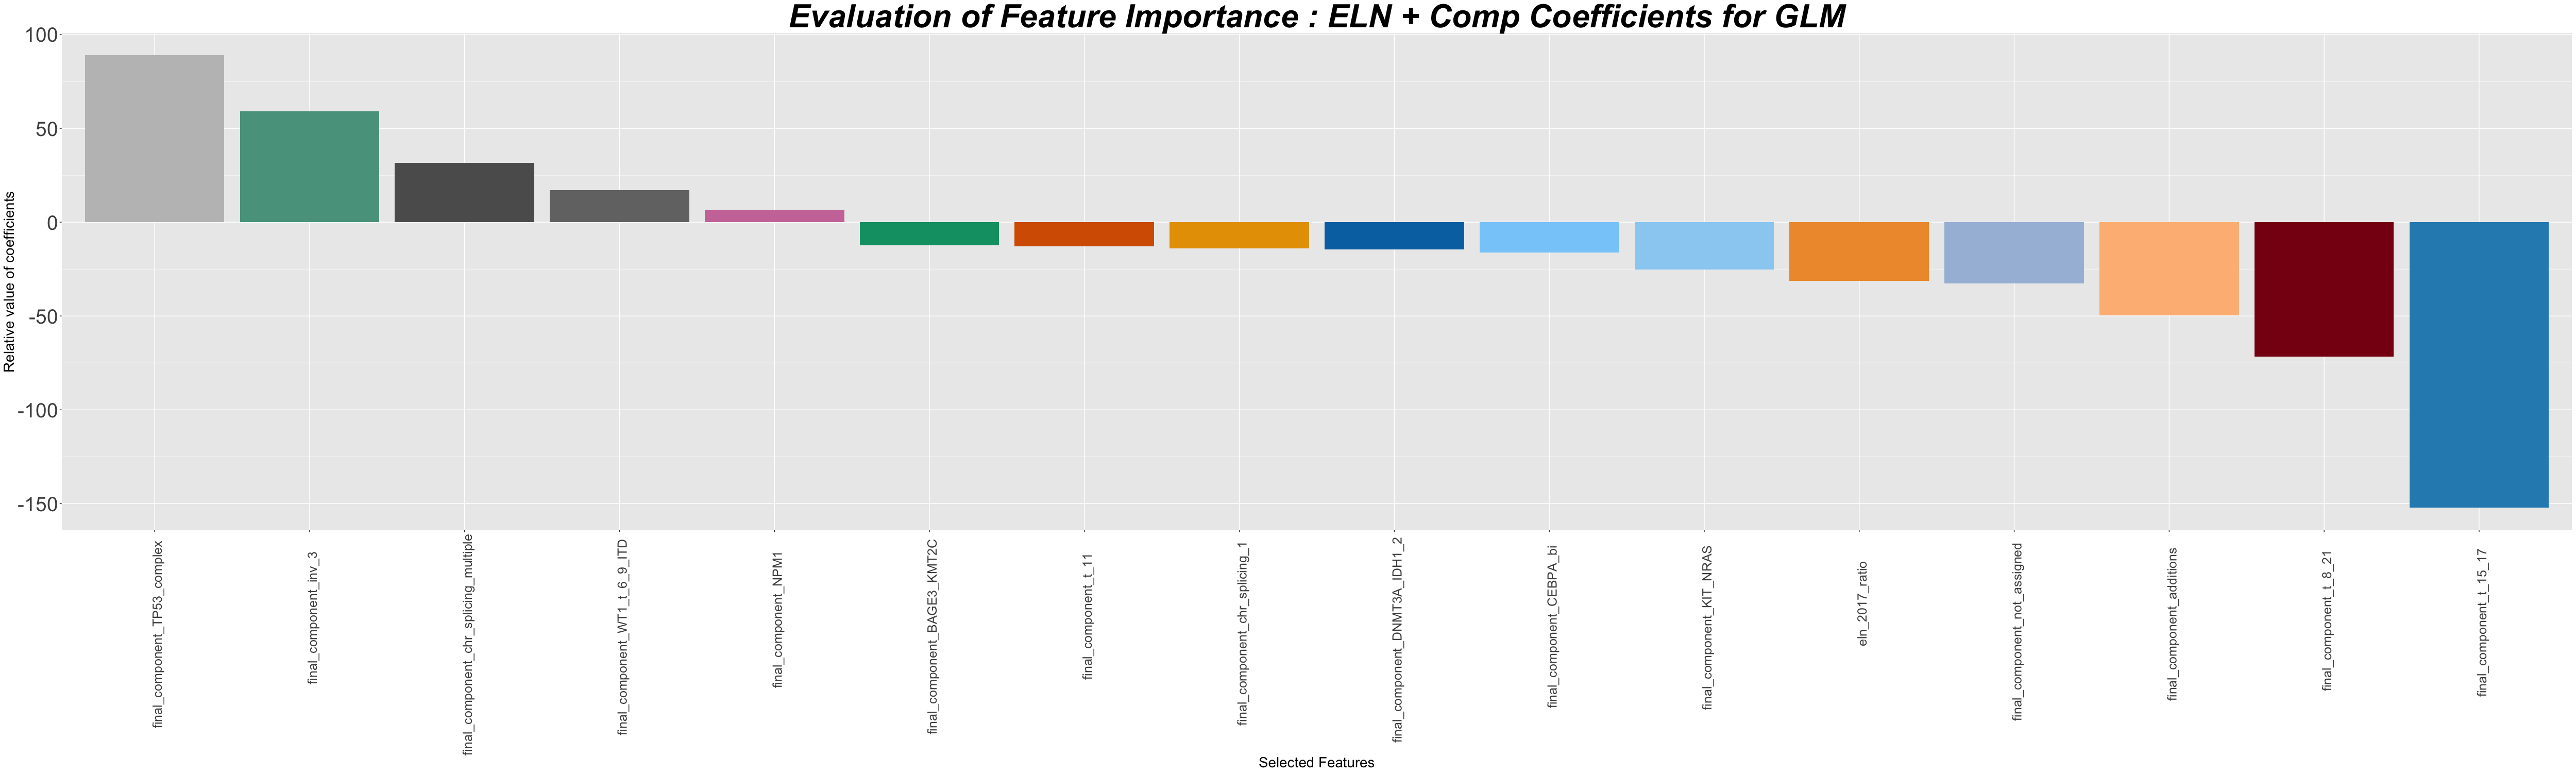

In [100]:
eln_comp_glm <- df_bootstrap[startsWith(df_bootstrap$model_algo,"eln_comp_bootstrap_glm"),]
eln_comp_glm <- eln_comp_glm[,c('feature','sum_coef','num_selected')] %>% group_by(feature) %>% summarize_all(sum)
eln_comp_glm$proportion_coefficients <- eln_comp_glm$sum_coef /3
set_notebook_plot_size(50,15)
ggplot(na.omit(eln_comp_glm),aes(x=reorder(feature,-proportion_coefficients),y=proportion_coefficients))+geom_bar(stat = "identity", aes(fill = reorder(feature,-proportion_coefficients)))+
theme(plot.title = element_text( size=45, face="bold.italic",hjust=0.5),legend.position="none",axis.text.x = element_text(angle = 90, hjust = 0.8,vjust=0.8,size=18),axis.text.y=element_text(size=28),axis.title.y = element_text(size = 20),axis.title.x = element_text(size = 20))+xlab("Selected Features") +
ylab("Relative value of coefficients") + ggtitle("Evaluation of Feature Importance : ELN + Comp Coefficients for GLM")+scale_fill_manual(values = cols)